#**EE769 Introduction to Machine Learning**

#Programming Assignment – 2 : ML for Smart Monkeys

**Name:** Prafull Pratap Bhosale

**Roll No.** 203010005

# Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

#Read data from given URL and create pandas data frame

## Read training data

In [2]:
url_train =  'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv'
mouseTrain_df = pd.read_csv(url_train)
display(mouseTrain_df)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


**Observations:**
1. Different columns have different min, max, range

## Read test data

In [3]:
url_test =  'https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv'
mouseTest_df = pd.read_csv(url_test)
display(mouseTest_df)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


# Preprocessing

In [4]:
# split training data into X and Y matrices
# separate training data set X and target variable Y
train_X_allCols = mouseTrain_df.drop(['Genotype','Treatment_Behavior'],axis=1,inplace=False)

## Check for missing values in columns

In [5]:
# define a function to check types of values in all columns of input dataset
def checkColumnVals(df):
  for col in df.columns.values:
    list_vals = pd.unique(df[col])
    print(col + '=> Type: ' + str(df[col].dtypes) + ', Uniques values: ' + str(len(list_vals)) + ', NaN values: ' + str(df[col].isnull().sum()))
    if len(list_vals) <10:
      print('Unique values in column ' + col + ' = ' + str(list_vals))


In [6]:
checkColumnVals(train_X_allCols)

DYRK1A_N=> Type: float64, Uniques values: 762, NaN values: 0
ITSN1_N=> Type: float64, Uniques values: 761, NaN values: 0
BDNF_N=> Type: float64, Uniques values: 762, NaN values: 0
NR1_N=> Type: float64, Uniques values: 762, NaN values: 0
NR2A_N=> Type: float64, Uniques values: 762, NaN values: 0
pAKT_N=> Type: float64, Uniques values: 762, NaN values: 0
pBRAF_N=> Type: float64, Uniques values: 760, NaN values: 0
pCAMKII_N=> Type: float64, Uniques values: 762, NaN values: 0
pCREB_N=> Type: float64, Uniques values: 762, NaN values: 0
pELK_N=> Type: float64, Uniques values: 762, NaN values: 0
pERK_N=> Type: float64, Uniques values: 762, NaN values: 0
pJNK_N=> Type: float64, Uniques values: 761, NaN values: 0
PKCA_N=> Type: float64, Uniques values: 762, NaN values: 0
pMEK_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR1_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR2A_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR2B_N=> Type: float64, Uniques values: 762, Na

**Observations:**

*   All datatypes are float except for target variables. This is good thing for us.


* Many NaN values in columns Bcatenin_N, BAD_N, BCL2_N, pCFOS_N, H3AcK18_N, EGR1_N, H3MeK4_N


* We will impute these values with mean of the corresponding column

## Impute missing values
missing value = mean of column

In [7]:
# we create a function that will impute values for both training and test data
def imputeMissingValues(df):
  imp = SimpleImputer(missing_values=np.nan, strategy='mean') # impute missing values with mean of the column
  for col in df.columns.values:
    # impute missing values
    if (df[col].isnull().sum()>0):
      df[col] = imp.fit_transform(df[col].values.reshape(-1,1))[:,0]

In [8]:
imputeMissingValues(train_X_allCols)

In [9]:
# check for missing again after imputation
checkColumnVals(train_X_allCols)

DYRK1A_N=> Type: float64, Uniques values: 762, NaN values: 0
ITSN1_N=> Type: float64, Uniques values: 761, NaN values: 0
BDNF_N=> Type: float64, Uniques values: 762, NaN values: 0
NR1_N=> Type: float64, Uniques values: 762, NaN values: 0
NR2A_N=> Type: float64, Uniques values: 762, NaN values: 0
pAKT_N=> Type: float64, Uniques values: 762, NaN values: 0
pBRAF_N=> Type: float64, Uniques values: 760, NaN values: 0
pCAMKII_N=> Type: float64, Uniques values: 762, NaN values: 0
pCREB_N=> Type: float64, Uniques values: 762, NaN values: 0
pELK_N=> Type: float64, Uniques values: 762, NaN values: 0
pERK_N=> Type: float64, Uniques values: 762, NaN values: 0
pJNK_N=> Type: float64, Uniques values: 761, NaN values: 0
PKCA_N=> Type: float64, Uniques values: 762, NaN values: 0
pMEK_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR1_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR2A_N=> Type: float64, Uniques values: 762, NaN values: 0
pNR2B_N=> Type: float64, Uniques values: 762, Na

**Observations**:
All null values are removed after imputation

### Check skew of each feature and transform highly skewed features using log
* To determine if columns are Gaussian distributed or not.
* If they are highly skewed, then we apply log transformation for columns with skew > 0.5

In [10]:
from pandas.api.types import is_numeric_dtype

In [11]:
# get skew of each column
def getColsToTranform(df,skew_threshold):
  col_to_transform = []
  for col in df.columns.values:
    if is_numeric_dtype(df.dtypes[col]):
      skew = df[col].skew()
      if (skew>skew_threshold):
        col_to_transform.append(col)
        #print(col + ': Skew = ', skew)
  
  return col_to_transform

In [12]:
def getColsSkew(df,skew_threshold):
  col_to_transform = []
  for col in df.columns.values:
    if is_numeric_dtype(df.dtypes[col]):
      skew = df[col].skew()
      if (skew>skew_threshold):
        print(col + ': Skew = ', skew)

In [13]:
skew_threshold = 0.5
getColsSkew(train_X_allCols,skew_threshold)
col_to_log_transform = getColsToTranform(train_X_allCols,skew_threshold)

DYRK1A_N: Skew =  4.407135958646165
ITSN1_N: Skew =  3.766958575518202
NR2A_N: Skew =  0.5754085070833971
pCAMKII_N: Skew =  0.5079683720942025
pELK_N: Skew =  4.165094789973143
pERK_N: Skew =  4.031349484868976
pPKCAB_N: Skew =  0.6237688582984972
BRAF_N: Skew =  4.4695370696372025
CAMKII_N: Skew =  0.6447328549396469
CREB_N: Skew =  0.5465608009587519
ELK_N: Skew =  1.4633751666322286
ERK_N: Skew =  0.6630894089442401
GSK3B_N: Skew =  1.1453599062535225
RSK_N: Skew =  0.8704826656278609
SOD1_N: Skew =  1.1564351058784412
P38_N: Skew =  0.8504022564422395
AMPKA_N: Skew =  0.739656799805063
pNUMB_N: Skew =  0.735662830505315
RAPTOR_N: Skew =  0.863741919612239
TIAM1_N: Skew =  0.7139062611943959
pP70S6_N: Skew =  1.0580179488607946
NUMB_N: Skew =  0.8197946122404731
pGSK3B_N: Skew =  0.6155572381952474
ADARB1_N: Skew =  1.055899743821649
AcetylH3K9_N: Skew =  2.857066695863848
RRP1_N: Skew =  4.838803864317729
Tau_N: Skew =  2.1167174268473334
GFAP_N: Skew =  0.9467097551607868
GluR4_N

### Apply log transformation to columns with high skew

In [14]:
train_X_allCols[col_to_log_transform] = np.log(train_X_allCols[col_to_log_transform] + 1 - np.min(train_X_allCols[col_to_log_transform])) # apply log transformation for highly skewed columns

https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html#:~:text=A%20common%20technique%20for%20handling,Y%2Ba)%20%3D%201.

In [15]:
# check columns with high skew after log transformation
getColsSkew(train_X_allCols,skew_threshold)

DYRK1A_N: Skew =  2.8153445645580533
ITSN1_N: Skew =  2.198425442273414
pELK_N: Skew =  2.0843531695706212
pERK_N: Skew =  2.2244494657773943
BRAF_N: Skew =  3.086991704782043
ELK_N: Skew =  0.8151274654734636
RSK_N: Skew =  0.7691780589711037
SOD1_N: Skew =  0.8598960350945724
P38_N: Skew =  0.5568270799515074
AMPKA_N: Skew =  0.5252105338397768
pNUMB_N: Skew =  0.5532915633748645
RAPTOR_N: Skew =  0.7094844818359671
TIAM1_N: Skew =  0.5279559332145086
NUMB_N: Skew =  0.7206824099562869
pGSK3B_N: Skew =  0.5348783853985556
ADARB1_N: Skew =  0.5030538768634023
AcetylH3K9_N: Skew =  2.284569280941763
RRP1_N: Skew =  3.8180186344482316
Tau_N: Skew =  1.8434888384614159
GFAP_N: Skew =  0.8462389393049845
GluR4_N: Skew =  1.8122351417391827
SHH_N: Skew =  0.8805559229732004
BAD_N: Skew =  1.0330164709660432
BCL2_N: Skew =  1.223175115340941
pCFOS_N: Skew =  0.7273730625818272
H3AcK18_N: Skew =  2.0278649466421514
EGR1_N: Skew =  1.0488782362411537
H3MeK4_N: Skew =  1.0110667983111221


**Observations:**
1. For highly skewed columns, we applied log transformation
2. After log transformation, the skew is reduced to lower value. Now we can normalize the data using mean and std assuming that data is approximately Gaussian distributed.
Skew of few columns became lessd than skew_threshold: 0.5 after log transformation. Hence they are not shown above
2. All variables are continuous. No discrete variable in dataset.

## Check whether any two columns are correlated
 we use spearman correlation

In [16]:
import seaborn as sns
corr_matrix = train_X_allCols.corr(method='spearman') # using spearman correlation for nonlinear correlation between variables
#fig, ax = plt.subplots(figsize=(100,100))
#sns.heatmap(abs(corr_matrix),annot=True)
#plt.show()

* Since plotting was taking too much time for 77 features, we just print the names of columns with correlation greater than threshold of 0.9

In [17]:
#Ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df,method='spearman', threshold=0.9, n=5):
    au_corr = df.corr(method).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr >= threshold]

print("Top Absolute Correlations")
highCorr = get_top_abs_correlations(train_X_allCols,threshold=0.9)
print(highCorr)

Top Absolute Correlations
ARC_N     pS6_N         1.000000
NR1_N     pNR1_N        0.940771
pNR1_N    pNR2B_N       0.929269
NR1_N     Bcatenin_N    0.922166
DYRK1A_N  pERK_N        0.922122
          ITSN1_N       0.912085
NR1_N     pNR2B_N       0.908044
dtype: float64


Ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

**Observations:**


1.  Above columns have correlation greater than threshold of 0.9
2.  We will drop one of these columns



In [18]:
# drop one of the columns from two correlated columns
highCorrCols = highCorr.index.to_numpy()
n = 1 # N. . .
cols_to_drop = [x[n] for x in highCorrCols]

## Prepare the training data
* Eliminate useless columns
* Convert categorical variables to one-hot-bit
* Normalize columns so that no variable has a disproportionate sway on the model

In [19]:
from sklearn import preprocessing

In [20]:
# Normalize the data (so that each column has zero mean and unit variance)
scaler = preprocessing.StandardScaler() # For data normalization

In [21]:
scaler.fit(train_X_allCols) # compute mean and std

train_X_allCols = pd.DataFrame(scaler.transform(train_X_allCols), index=train_X_allCols.index
                               , columns=train_X_allCols.columns) # Use mean and std for transforming training dataset X

In [22]:
# drop useless columns from training data
train_X = train_X_allCols.drop(cols_to_drop,axis=1,inplace=False)

In [23]:
# check correlation again
print("Top abs correlation after dropping columns:")
print(get_top_abs_correlations(train_X,threshold=0.9))

Top abs correlation after dropping columns:
Series([], dtype: float64)


**Observation:**
* After dropping one of the correlated columns, we are getting zero columns with correlation higher than threshold of 0.9

## Prepare test data
* Impute missing values in test data
* Drop same useless columns from test data as well
* We normalize test data using same scaler fitted on training data

In [24]:
# separate training data set X and target variable Y
test_X_allCols = mouseTest_df.drop(['Genotype','Treatment_Behavior'],axis=1,inplace=False)

### Check for missing values in columns for test data

In [25]:
checkColumnVals(test_X_allCols)

DYRK1A_N=> Type: float64, Uniques values: 225, NaN values: 0
ITSN1_N=> Type: float64, Uniques values: 225, NaN values: 0
BDNF_N=> Type: float64, Uniques values: 225, NaN values: 0
NR1_N=> Type: float64, Uniques values: 225, NaN values: 0
NR2A_N=> Type: float64, Uniques values: 225, NaN values: 0
pAKT_N=> Type: float64, Uniques values: 225, NaN values: 0
pBRAF_N=> Type: float64, Uniques values: 225, NaN values: 0
pCAMKII_N=> Type: float64, Uniques values: 225, NaN values: 0
pCREB_N=> Type: float64, Uniques values: 225, NaN values: 0
pELK_N=> Type: float64, Uniques values: 225, NaN values: 0
pERK_N=> Type: float64, Uniques values: 225, NaN values: 0
pJNK_N=> Type: float64, Uniques values: 225, NaN values: 0
PKCA_N=> Type: float64, Uniques values: 225, NaN values: 0
pMEK_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR1_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR2A_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR2B_N=> Type: float64, Uniques values: 225, Na

**Observations:**
* Many null values in columns BAD_N, BCL2_N, pCFOS_N, H3AcK18_N, EGR1_N, H3MeK4_N


* We will impute these values with mean of the corresponding column

### Impute missing values in test data
missing value = mean of column

In [26]:
imputeMissingValues(test_X_allCols)

In [27]:
# check for missing again after imputation
checkColumnVals(test_X_allCols)

DYRK1A_N=> Type: float64, Uniques values: 225, NaN values: 0
ITSN1_N=> Type: float64, Uniques values: 225, NaN values: 0
BDNF_N=> Type: float64, Uniques values: 225, NaN values: 0
NR1_N=> Type: float64, Uniques values: 225, NaN values: 0
NR2A_N=> Type: float64, Uniques values: 225, NaN values: 0
pAKT_N=> Type: float64, Uniques values: 225, NaN values: 0
pBRAF_N=> Type: float64, Uniques values: 225, NaN values: 0
pCAMKII_N=> Type: float64, Uniques values: 225, NaN values: 0
pCREB_N=> Type: float64, Uniques values: 225, NaN values: 0
pELK_N=> Type: float64, Uniques values: 225, NaN values: 0
pERK_N=> Type: float64, Uniques values: 225, NaN values: 0
pJNK_N=> Type: float64, Uniques values: 225, NaN values: 0
PKCA_N=> Type: float64, Uniques values: 225, NaN values: 0
pMEK_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR1_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR2A_N=> Type: float64, Uniques values: 225, NaN values: 0
pNR2B_N=> Type: float64, Uniques values: 225, Na

**Observations**:
All null values are removed after imputation

## Apply log transformation to the same test data columns for which we have applied log transformation to the training data

In [28]:
# check columns with high skew before log transformation
getColsSkew(test_X_allCols,skew_threshold)

DYRK1A_N: Skew =  0.750798619050329
ITSN1_N: Skew =  0.5599484611343792
pELK_N: Skew =  0.6728134500903957
pERK_N: Skew =  0.7524924603907513
pPKCAB_N: Skew =  0.8493475711226399
BRAF_N: Skew =  0.6298273685782807
CREB_N: Skew =  1.1349688331284191
ELK_N: Skew =  1.2808399321739632
ERK_N: Skew =  0.726547586169137
SOD1_N: Skew =  1.3097901619503605
MTOR_N: Skew =  0.7062277462484338
P38_N: Skew =  0.9880342797366284
DSCR1_N: Skew =  0.6526107937550464
AMPKA_N: Skew =  1.0883952313985892
NR2B_N: Skew =  0.5846732598405955
pNUMB_N: Skew =  0.8797982334120988
RAPTOR_N: Skew =  0.8575580701067883
TIAM1_N: Skew =  0.6682509734525088
NUMB_N: Skew =  0.5624656240495232
CDK5_N: Skew =  4.871178566017961
S6_N: Skew =  0.5331655761007722
ADARB1_N: Skew =  0.7388092096533795
AcetylH3K9_N: Skew =  0.6963227934356464
RRP1_N: Skew =  0.798647392513323
Tau_N: Skew =  0.7765716665369312
GFAP_N: Skew =  0.5183910070978712
GluR4_N: Skew =  7.054123480533302
IL1B_N: Skew =  0.6972287060234589
pCASP9_N: S

In [29]:
# apply log transformation for highly skewed columns
test_X_allCols[col_to_log_transform] = np.log(test_X_allCols[col_to_log_transform] + 1 - np.min(test_X_allCols[col_to_log_transform]))

In [30]:
# check columns with high skew after log transformation
getColsSkew(test_X_allCols,skew_threshold)

DYRK1A_N: Skew =  0.5331173945089428
CREB_N: Skew =  0.9936135730636368
ELK_N: Skew =  0.5768443397709615
SOD1_N: Skew =  0.9035636751433822
MTOR_N: Skew =  0.7062277462484338
P38_N: Skew =  0.7279824670417435
DSCR1_N: Skew =  0.6526107937550464
AMPKA_N: Skew =  0.9257280121441716
NR2B_N: Skew =  0.5846732598405955
pNUMB_N: Skew =  0.7302048919454547
RAPTOR_N: Skew =  0.7953217215095328
TIAM1_N: Skew =  0.5546605220441443
CDK5_N: Skew =  4.871178566017961
S6_N: Skew =  0.5331655761007722
AcetylH3K9_N: Skew =  0.5921145169435863
Tau_N: Skew =  0.6817354278673754
GluR4_N: Skew =  5.792460551688436
IL1B_N: Skew =  0.6972287060234589
pCASP9_N: Skew =  0.6483787239036273
SNCA_N: Skew =  1.2192159326243057
SHH_N: Skew =  0.8241722809862575
BAD_N: Skew =  0.7317782614171451
BCL2_N: Skew =  0.7900616365299878
pCFOS_N: Skew =  1.8601385174183278
H3AcK18_N: Skew =  1.025389056239247
EGR1_N: Skew =  1.2391075927088133
H3MeK4_N: Skew =  1.074501795862594


### Normalize test data with same mean and std as that of training data

In [31]:
# Use mean and std for transforming training dataset X
test_X_allCols = pd.DataFrame(scaler.transform(test_X_allCols), index=test_X_allCols.index, columns=test_X_allCols.columns)

In [32]:
print(test_X_allCols.mean()) 

DYRK1A_N     0.061751
ITSN1_N     -0.002010
BDNF_N      -0.275866
NR1_N       -0.296281
NR2A_N      -0.141083
               ...   
SYP_N       -0.232596
H3AcK18_N   -0.440401
EGR1_N      -0.693273
H3MeK4_N    -0.719820
CaNA_N      -0.104360
Length: 77, dtype: float64


**Observations:**
* The means of columns of test data are not close to zero as we didn't re-fit on test data

### Drop useless columns from test data

In [33]:
# drop useless columns from training data
test_X = test_X_allCols.drop(cols_to_drop,axis=1,inplace=False)

# **Classification based on genotype**

## Training data class imbalance

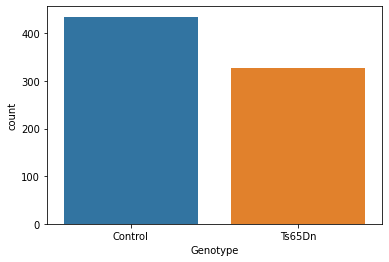

In [34]:
sns.countplot(x=mouseTrain_df['Genotype'])

 **Observation:**
 Classes are balanced as count of both classes are almost in similar

## Test data class imbalance

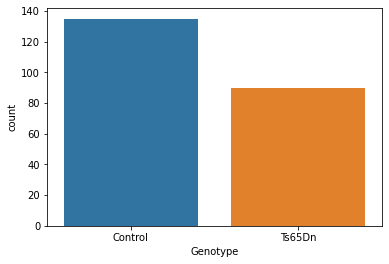

In [35]:
sns.countplot(x=mouseTest_df['Genotype'])

**Observations:**

Both classes' sample counts is not too different. i.e. classes are balanced

## Extract output vector Y for training and test data

In [36]:
# Ref: https://www.youtube.com/watch?v=fyHaUMX9y0A
train_dummy = pd.get_dummies(mouseTrain_df['Genotype']) # convert categorical column of Genotype to dummy variables
test_dummy = pd.get_dummies(mouseTest_df['Genotype']) # convert categorical column of Genotype to dummy variables

In [37]:
train_Y = train_dummy['Control'] # for binary classification only one out of two dummy variables is sufficient
test_Y = test_dummy['Control'] # for binary classification only one out of two dummy variables is sufficient

##Rigourous training and validation

In [38]:
# First we will use an automated grid-search over range of hyperparameters 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score # ROC-AUC and Fl are balanced metrics 
from sklearn.model_selection import StratifiedKFold # for splitting the data for cross-validation

* Stratified K-fold was used as it ensures class balance for splits

In [39]:
# generate split object for cross validation
# this was done to ensure that split is same for all models
n_splits=5
kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)

### Elastic-net logistic regression using sklearn

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
print('Training Elastic net logistic regression using GridSearchCV')
scoring = 'f1'

hyperparameters = {'C':[0.01,0.1,1,10], 'l1_ratio':np.linspace(0,1,10)}
# these are hyperparameters that we will try

logisticRegClf = LogisticRegression(penalty='elasticnet',solver='saga',max_iter=3000)
elasNetClf = GridSearchCV(estimator=logisticRegClf,param_grid=hyperparameters,scoring=scoring,cv=kf)
elasNetClf.fit(train_X, train_Y)
print('Best parameters:')
print(elasNetClf.best_params_)
print('Best ' + scoring + ':' + str(elasNetClf.best_score_))

print('Test classification report:')
y_true, y_pred = test_Y, elasNetClf.predict(test_X)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Training Elastic net logistic regression using GridSearchCV
Best parameters:
{'C': 1, 'l1_ratio': 0.0}
Best f1:0.9851142352986765
Test classification report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        90
           1       0.85      0.78      0.81       135

    accuracy                           0.79       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.79      0.79      0.79       225

Test AUC-ROC: 0.788888888888889


https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Observations:**
* Best hyperparameters: 
C = 1, L1 ratio: = 0.0
* Best f1 score: 0.985
* Test AUC-ROC: 0.789


### Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
nbNeuronsInHiddenLayer = [20,40,60,80]
l2_penalty_param = [0.01,0.1,1,10]
meanAcc = []

for i in nbNeuronsInHiddenLayer:
  for j in l2_penalty_param:
    print('Neurons in hidden layer = ' + str(i))
    print('L2 penalty: ' + str(j))
    clf = MLPClassifier(activation='relu', solver='adam', alpha=j, learning_rate='adaptive', hidden_layer_sizes=(i,), random_state=1,max_iter=1000)

    acc = 0.
    for train_indices, test_indices in kf.split(train_X,train_Y):
      clf.fit(train_X.iloc[train_indices], train_Y.iloc[train_indices])
      acc_ = clf.score(train_X.iloc[test_indices], train_Y.iloc[test_indices])
      acc = acc + acc_
      #print(f1_score)
    acc = acc/n_splits
    print('Mean accuracy = ' + str(acc))
    print('------------------------------------------')
    meanAcc.append((i,j,acc))

Neurons in hidden layer = 20
L2 penalty: 0.01
Mean accuracy = 0.9973856209150327
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 0.1
Mean accuracy = 0.9960698314413484
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 1
Mean accuracy = 0.9921310629514963
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 10
Mean accuracy = 0.8530529755761954
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 0.01
Mean accuracy = 0.9934468524251805
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 0.1
Mean accuracy = 0.9960698314413484
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 1
Mean accuracy = 0.989516683866529
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 10
Mean accuracy = 0.84250085999312
------------------------------------------
Neurons in hidden layer

Best hyperparameters:
Neurons in hidden layer: 20, l2_penalty: 0.01


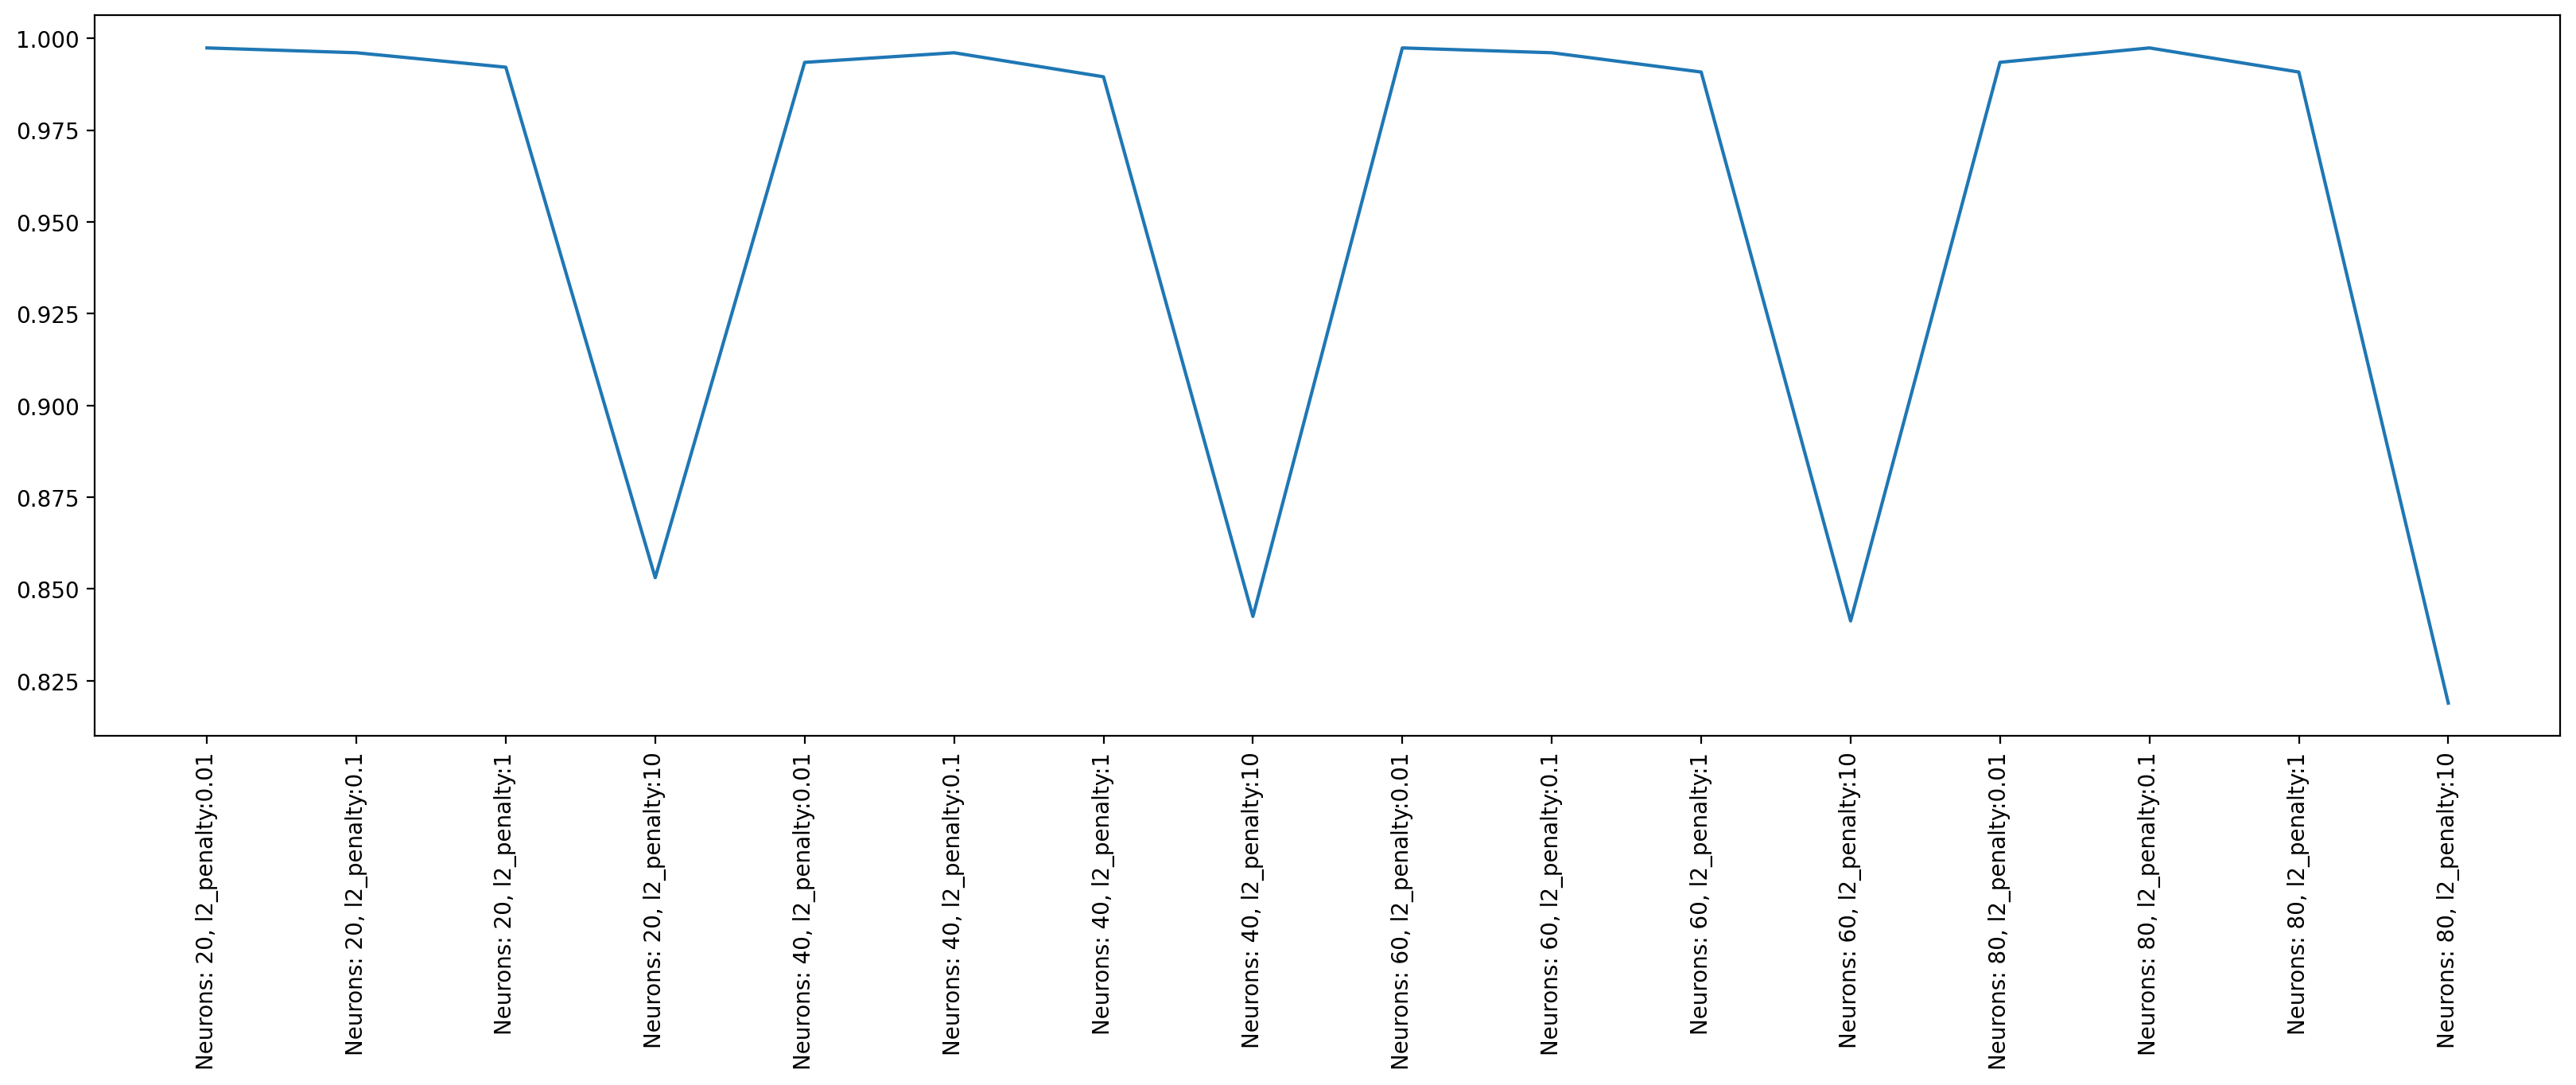

In [44]:
# plot
X = []
for i in range(len(meanAcc)):
  X.append('Neurons: ' + str(meanAcc[i][0]) + ', l2_penalty:' + str(str(meanAcc[i][1])))
Y = [x[2] for x in meanAcc]

# to find hyperparams corresponding to max f1 score
ind_maxF1Score_nn = np.argmax(Y)
print('Best hyperparameters:')
print('Neurons in hidden layer: ' + str(meanAcc[ind_maxF1Score_nn][0]) + ', l2_penalty: ' + str(meanAcc[ind_maxF1Score_nn][1]))

plt.figure(figsize=(20,6),dpi=200)
plt.plot(X,Y)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
* Best mean accuracy = 0.997
* We get maximum value for following hyperparameters:

  Number of neurons in hidden layer = 20

  L2 penalty parameter = 0.01

#### Testing best neural network on test data

In [45]:
clf = MLPClassifier(activation='relu', solver='adam', alpha=0.01, learning_rate='adaptive', hidden_layer_sizes=(40,), random_state=1,max_iter=1000)

# train again on whole training data
clf.fit(train_X, train_Y)
print('Mean score on test data for best neural network: ' + str(clf.score(test_X,test_Y)))

Mean score on test data for best neural network: 0.7733333333333333


###SVM classifier

In [46]:
from sklearn import svm

In [47]:
print('Training SVC using GridSearchCV')
scoring = 'f1'

hyperparameters = {'kernel':('rbf','linear','poly'),'C':[0.001,0.005,0.01,0.1,1,10], 'degree':[3,5,8]}
# these are hyperparameters that we will try

svc = svm.SVC()
svcClf = GridSearchCV(estimator=svc,param_grid=hyperparameters,scoring=scoring,cv=kf)
svcClf.fit(train_X, np.squeeze(train_Y))
print('Best parameters:')
print(svcClf.best_params_)
print('Best ' + scoring + ':' + str(svcClf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), svcClf.predict(test_X)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Training SVC using GridSearchCV
Best parameters:
{'C': 10, 'degree': 3, 'kernel': 'poly'}
Best f1:1.0
Test classification report:
              precision    recall  f1-score   support

           0       0.75      0.54      0.63        90
           1       0.74      0.88      0.81       135

    accuracy                           0.75       225
   macro avg       0.75      0.71      0.72       225
weighted avg       0.75      0.75      0.74       225

Test AUC-ROC: 0.712962962962963


**Observations:**
* Best hyperparameters: 
C = 10, degree = 3, kernel = poly
* Best f1 score: 1.0
* Test AUC-ROC: 0.713

### Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()
hyper_params = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
rfclf = GridSearchCV(rfc, param_grid = hyper_params, scoring = scoring, cv=kf)
rfclf.fit(train_X,np.squeeze(train_Y))
print('Best parameters:')
print(rfclf.best_params_)
print('Best ' + scoring + ': ' + str(rfclf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfclf.predict(test_X)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Best parameters:
{'max_depth': 10, 'n_estimators': 100}
Best f1: 0.991986638502684
Test classification report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66        90
           1       0.77      0.79      0.78       135

    accuracy                           0.73       225
   macro avg       0.72      0.71      0.72       225
weighted avg       0.73      0.73      0.73       225

Test AUC-ROC: 0.7148148148148148


**Observations:**
* Best hyperparameters: 
'max_depth': 10, 'n_estimators': 100
* Best f1 score: 0.992
* Test AUC-ROC: 0.715

  ### To find feature importance

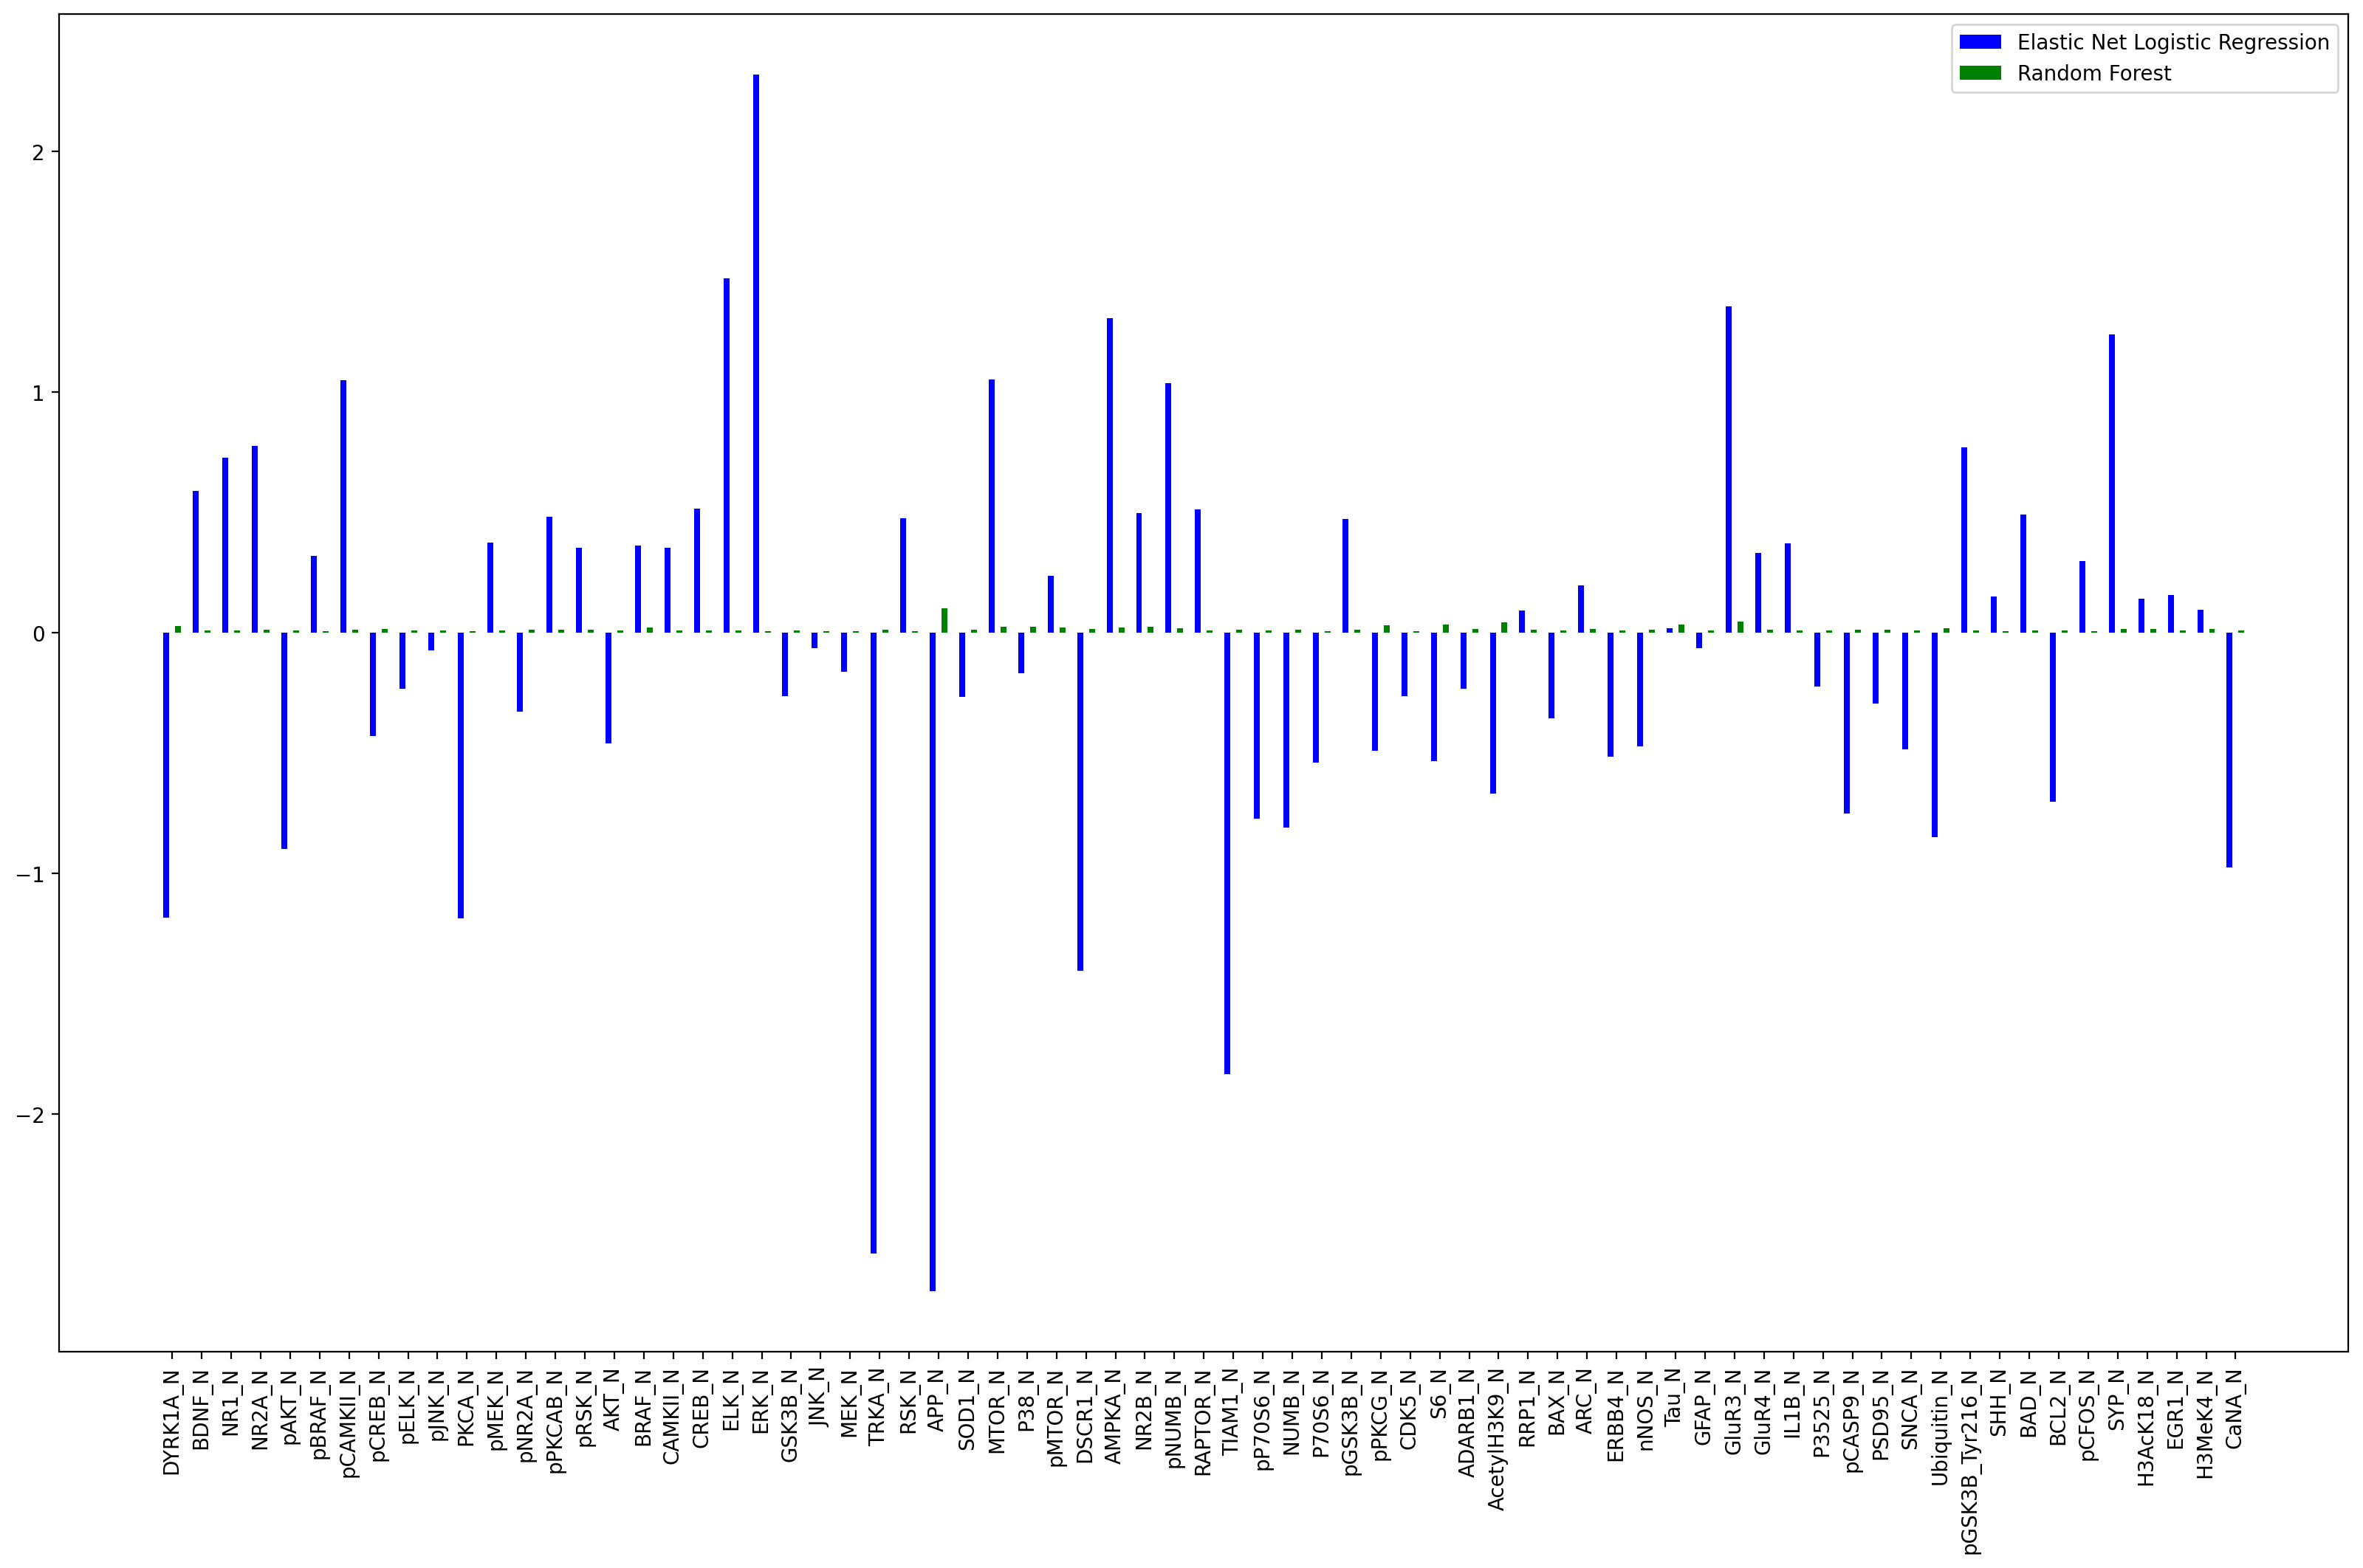

In [50]:
featImport_elasNet = elasNetClf.best_estimator_.coef_[0] # feature importance for model with elastic net
if svcClf.best_params_['kernel'] == 'linear':
  featImport_svc = svcClf.best_estimator_.coef_[0] # feature importance for model with SVC
featImport_randomForest = rfclf.best_estimator_.feature_importances_ # feature importance for model random forest
# summarize feature importance

# plot feature importance
# set width of bars
barWidth = 0.2

plt.figure(figsize=(20, 12),dpi=200)
featNames = elasNetClf.feature_names_in_
r1 = np.arange(len(featNames))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, featImport_elasNet,color='b',width=barWidth, label='Elastic Net Logistic Regression')
if svcClf.best_params_['kernel'] == 'linear':
  plt.bar(r2, featImport_svc,color='r',width=barWidth, label='SVC')
plt.bar(r3, featImport_randomForest,color='g',width=barWidth, label='Random Forest')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(featNames))], featNames)

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

https://pythonspot.com/matplotlib-bar-chart/

https://python-graph-gallery.com/11-grouped-barplot

https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib

## Recursive feature elimination
* For recursive feature elimination we need all features before we removed correlated columns

In [51]:
from sklearn.feature_selection import RFECV

### Recursive feature elimination for Logistic regression

In [52]:
print('Recursive feature elimination with elastic-net logistic regression')
scoring = 'f1'

rfeClf = RFECV(estimator=elasNetClf.best_estimator_,scoring=scoring, cv=kf)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Recursive feature elimination with elastic-net logistic regression
Number of selected feature: 40
Test classification report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76        90
           1       0.87      0.76      0.81       135

    accuracy                           0.79       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.79      0.79       225

Test AUC-ROC: 0.7944444444444445


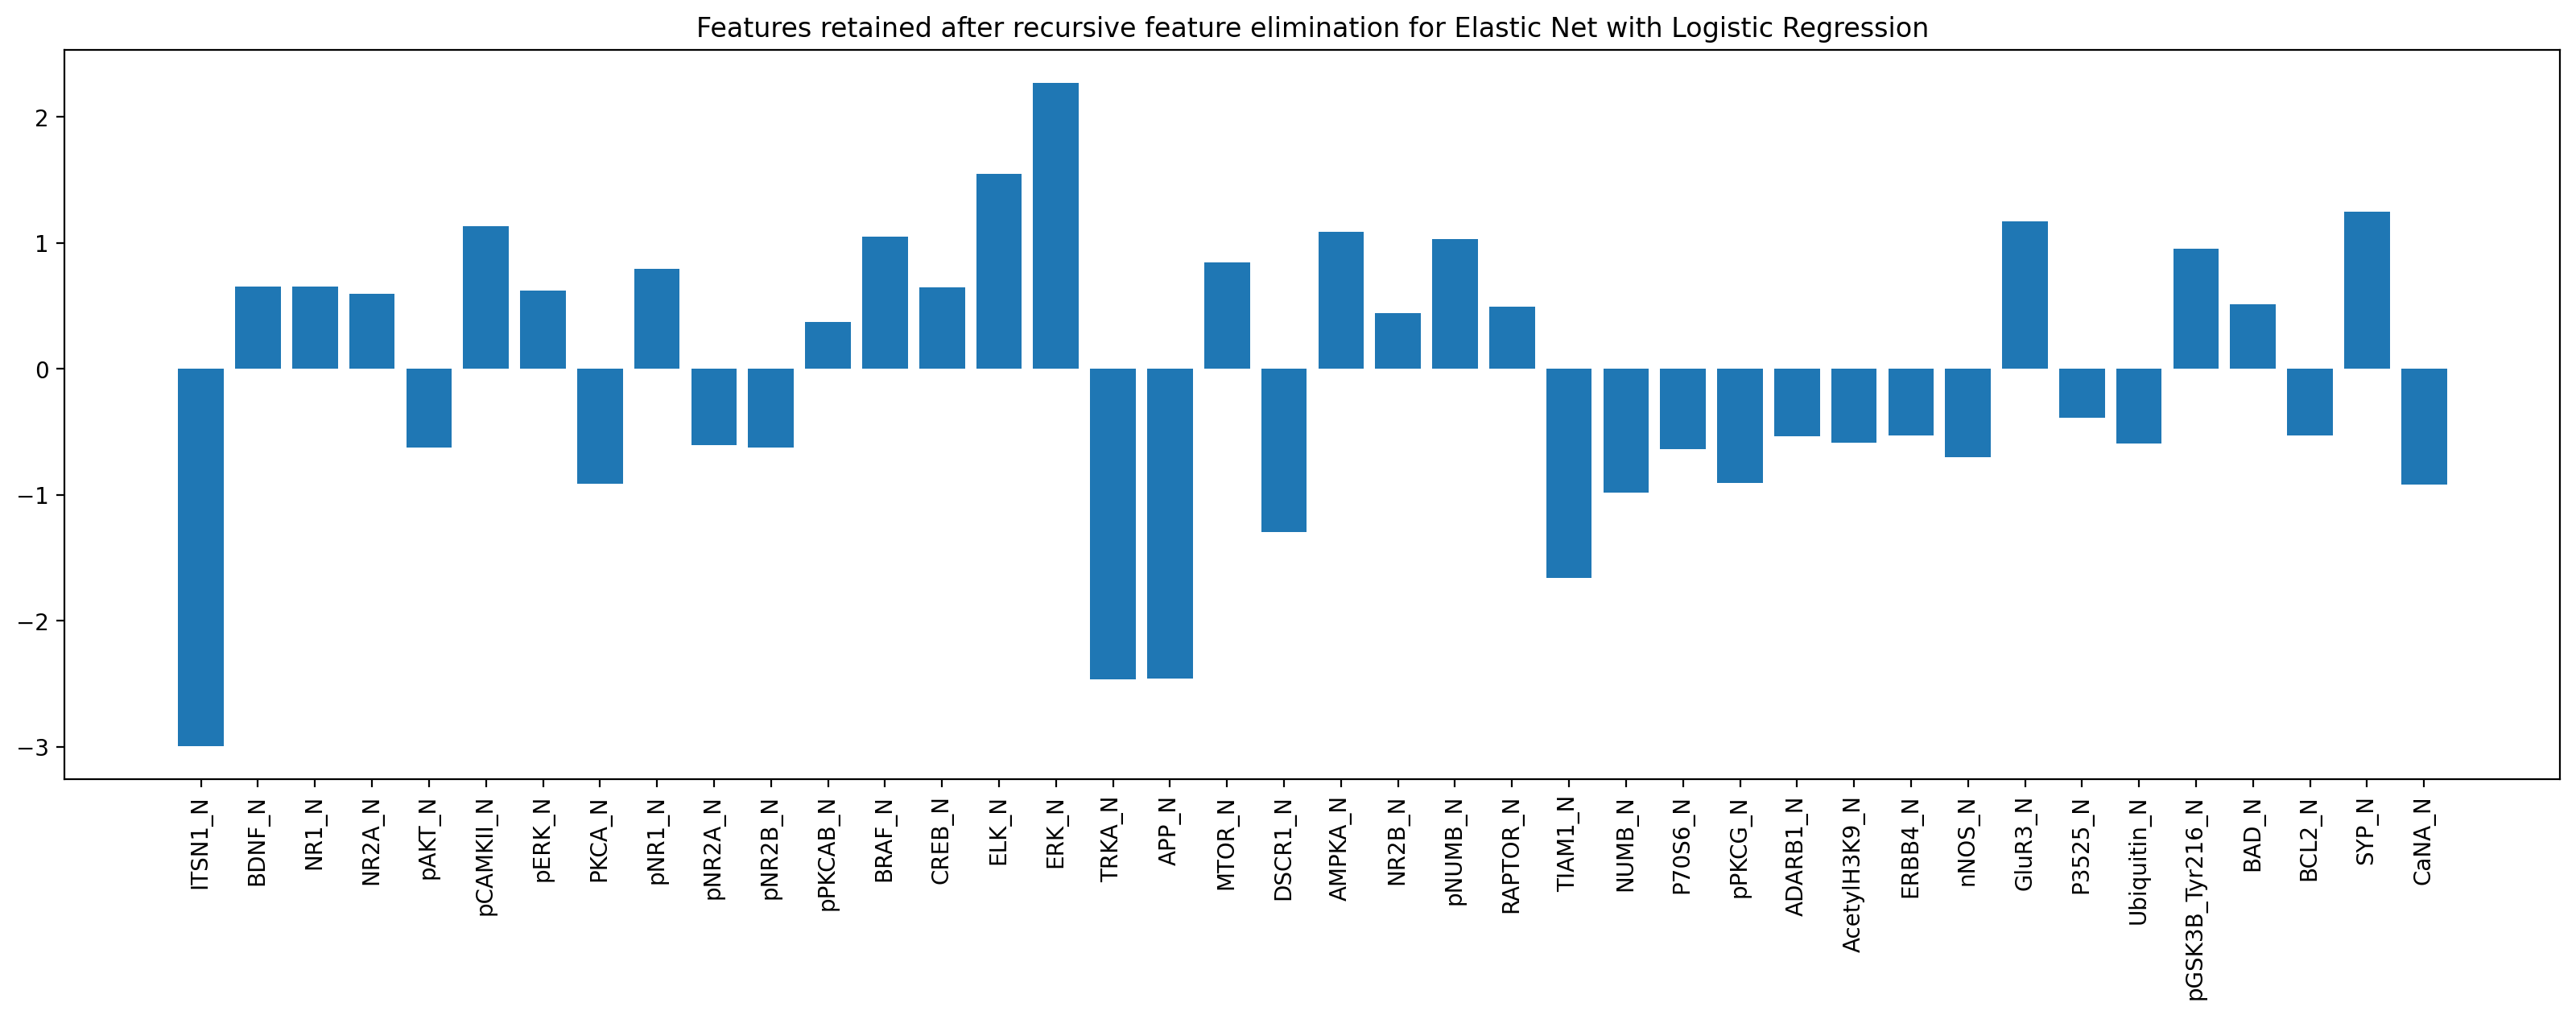

In [53]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.coef_[0]

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.xticks(rotation='vertical')
plt.title('Features retained after recursive feature elimination for Elastic Net with Logistic Regression')
plt.show()

**Observations:**
For elastic net with logistic regression
* The AUC_ROC computed on test data increases from **0.789** to **0.794** when we use recursive feature elimination
* Only 40 features out of total 77 are retained in the model.

  After RFE, features shown in above graph are only retained

### Recursive feature elimination for SVC

In [54]:
from sklearn.feature_selection import RFECV

print('Recursive feature elimination with SVC')
scoring = 'f1'

rfeClf = RFECV(estimator=svcClf.best_estimator_,scoring=scoring, cv=kf)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Recursive feature elimination with SVC


ValueError: ignored

In [ ]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.coef_[0]

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.xticks(rotation='vertical')
plt.title('Features retained after recursive feature elimination for SVC ')
plt.show()



### Recursive feature elimination for Random Forest Classifier

In [55]:
print('Recursive feature elimination with random forest classifier')
scoring = 'f1'

rfeClf = RFECV(estimator=rfclf.best_estimator_,scoring=scoring, cv=kf)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Recursive feature elimination with random forest classifier
Number of selected feature: 57
Test classification report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        90
           1       0.81      0.82      0.82       135

    accuracy                           0.78       225
   macro avg       0.77      0.77      0.77       225
weighted avg       0.78      0.78      0.78       225

Test AUC-ROC: 0.7666666666666667


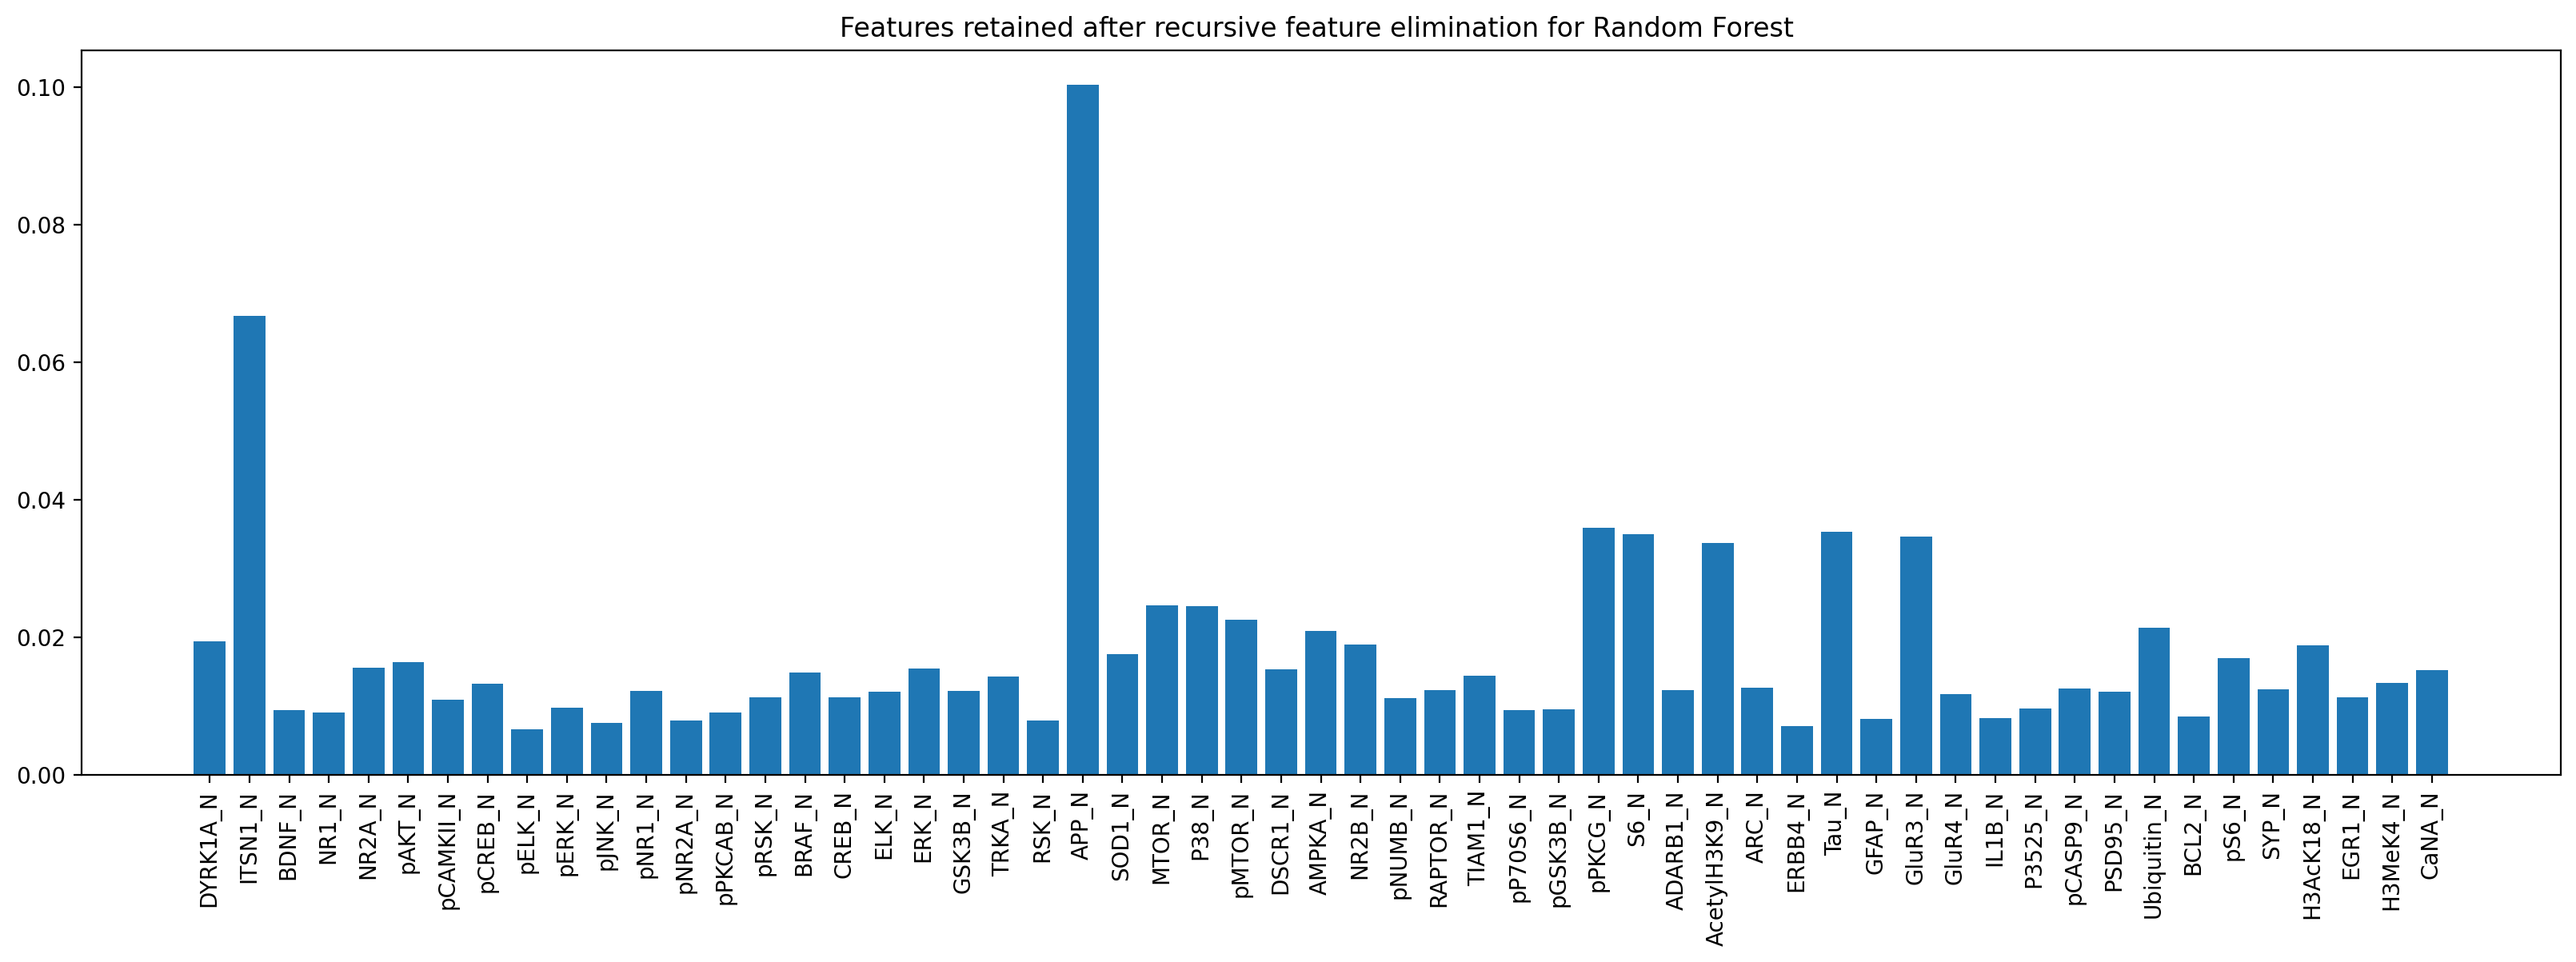

In [56]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.feature_importances_

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.title('Features retained after recursive feature elimination for Random Forest ')
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
For random forest
* The AUC_ROC computed on test data increases from **0.715** to **0.774** when we use recursive feature elimination
* Total 73 features out of 77 are retained in the model.

# **Classification based on Treatment_behaviour**

## Training data class imbalance

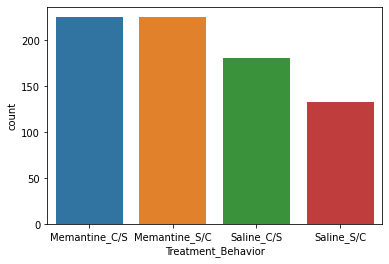

In [57]:
sns.countplot(x=mouseTrain_df['Treatment_Behavior'])

 **Observation:**
 Classes are balanced as count of both classes are almost in similar

## Test data class imbalance

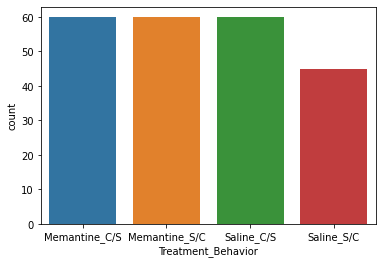

In [58]:
sns.countplot(x=mouseTest_df['Treatment_Behavior'])

**Observations:**

Both classes' sample counts is not too different. i.e. classes are balanced

## Extract output vector Y for training and test data

In [59]:
# Ref: https://www.youtube.com/watch?v=fyHaUMX9y0A
train_dummy = pd.get_dummies(mouseTrain_df['Treatment_Behavior']) # convert categorical column of Genotype to dummy variables
test_dummy = pd.get_dummies(mouseTest_df['Treatment_Behavior']) # convert categorical column of Genotype to dummy variables

In [60]:
# convert categorical columns to ordinals 0, 1, 2, 3
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
test_Y = enc.fit_transform(mouseTest_df['Treatment_Behavior'].values.reshape(-1,1))[:,0]
train_Y = enc.fit_transform(mouseTrain_df['Treatment_Behavior'].values.reshape(-1,1))[:,0]

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

##Rigourous training and validation

### Elastic-net logistic regression using sklearn

In [61]:
print('Training Elastic net logistic regression using GridSearchCV')
scoring = 'accuracy'

hyperparameters = {'C':[0.01,0.1,1,10,100], 'l1_ratio':np.linspace(0,1,5)}
# these are hyperparameters that we will try

logisticRegClf = LogisticRegression(multi_class='ovr',penalty='elasticnet',solver='saga',max_iter=4000,n_jobs=-1)
elasNetClf = GridSearchCV(estimator=logisticRegClf,param_grid=hyperparameters,scoring=scoring, cv=kf)
elasNetClf.fit(train_X, np.squeeze(train_Y))
print('Best parameters:')
print(elasNetClf.best_params_)
print('Best ' + scoring + ':' + str(elasNetClf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), elasNetClf.predict(test_X)
print(classification_report(y_true, y_pred))



Training Elastic net logistic regression using GridSearchCV
Best parameters:
{'C': 1, 'l1_ratio': 0.0}
Best accuracy:0.9829549363605092
Test classification report:
              precision    recall  f1-score   support

         0.0       0.50      0.98      0.67        60
         1.0       1.00      0.40      0.57        60
         2.0       0.80      0.07      0.12        60
         3.0       0.57      1.00      0.73        45

    accuracy                           0.59       225
   macro avg       0.72      0.61      0.52       225
weighted avg       0.73      0.59      0.51       225



https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Observations:**
* Best accuracy: 0.983
* Weighted avg accuracy on test data: 0.51

###SVM classifier

In [62]:
from sklearn import svm

In [63]:
print('Training SVC using GridSearchCV')
scoring = 'accuracy'

hyperparameters = {'kernel':('rbf','linear','poly'),'C':[0.001,0.005,0.01,0.1,1,10], 'degree':[3,5,8]}
# these are hyperparameters that we will try

svc = svm.SVC()
svcClf = GridSearchCV(estimator=svc,param_grid=hyperparameters,scoring=scoring, cv=kf)
svcClf.fit(np.array(train_X), np.squeeze(train_Y))
print('Best parameters:')
print(svcClf.best_params_)
print('Best ' + scoring + ':' + str(svcClf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), svcClf.predict(np.array(test_X))
print(classification_report(y_true, y_pred))

#print('Test AUC-ROC: ' + str(roc_auc_score(y_true, y_pred)))

Training SVC using GridSearchCV
Best parameters:
{'C': 10, 'degree': 3, 'kernel': 'poly'}
Best accuracy:0.9986928104575163
Test classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84        60
         1.0       0.91      0.48      0.63        60
         2.0       0.89      0.70      0.79        60
         3.0       0.57      0.96      0.72        45

    accuracy                           0.75       225
   macro avg       0.79      0.76      0.74       225
weighted avg       0.80      0.75      0.74       225



**Observations:**
* Best accuracy on cross-validation data: 0.9987
* Weighted avg accuracy on test data: 0.74

### Neural network with single ReLU hidden layer and Softmax output (number of neurons, weight decay)

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
nbNeuronsInHiddenLayer = [20,40,60,80]
l2_penalty_param = [0.01,0.1,1,10]
meanAcc = []

for i in nbNeuronsInHiddenLayer:
  for j in l2_penalty_param:
    print('Neurons in hidden layer = ' + str(i))
    print('L2 penalty: ' + str(j))
    clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=j, learning_rate='adaptive', hidden_layer_sizes=(i,), random_state=1,max_iter=3000)

    acc = 0.
    for train_indices, test_indices in kf.split(train_X,train_Y):
      #unique, counts = np.unique(train_Y[train_indices], return_counts=True)
      #result = np.column_stack((unique, counts)) 
      #print (result)
      clf.fit(train_X.iloc[train_indices], train_Y[train_indices])
      acc_ = clf.score(train_X.iloc[test_indices], train_Y[test_indices])
      #print(acc_)
      acc = acc + acc_
      #print(acc)
    acc = acc/n_splits
    print('Mean accuracy = ' + str(acc))
    print('------------------------------------------')
    meanAcc.append((i,j,acc))

Neurons in hidden layer = 20
L2 penalty: 0.01
Mean accuracy = 0.9908324733402132
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 0.1
Mean accuracy = 0.9973770209838321
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 1
Mean accuracy = 0.9986928104575163
------------------------------------------
Neurons in hidden layer = 20
L2 penalty: 10
Mean accuracy = 0.9934468524251805
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 0.01
Mean accuracy = 0.9986928104575163
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 0.1
Mean accuracy = 0.9986928104575163
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 1
Mean accuracy = 0.9973770209838321
------------------------------------------
Neurons in hidden layer = 40
L2 penalty: 10
Mean accuracy = 0.9973856209150327
------------------------------------------
Neurons in hidden la

**Observation:**

* Stratified K-Folds are used as it splits the data such that classes remains balanced

Best hyperparameters:
Neurons in hidden layer: 20, l2_penalty: 1


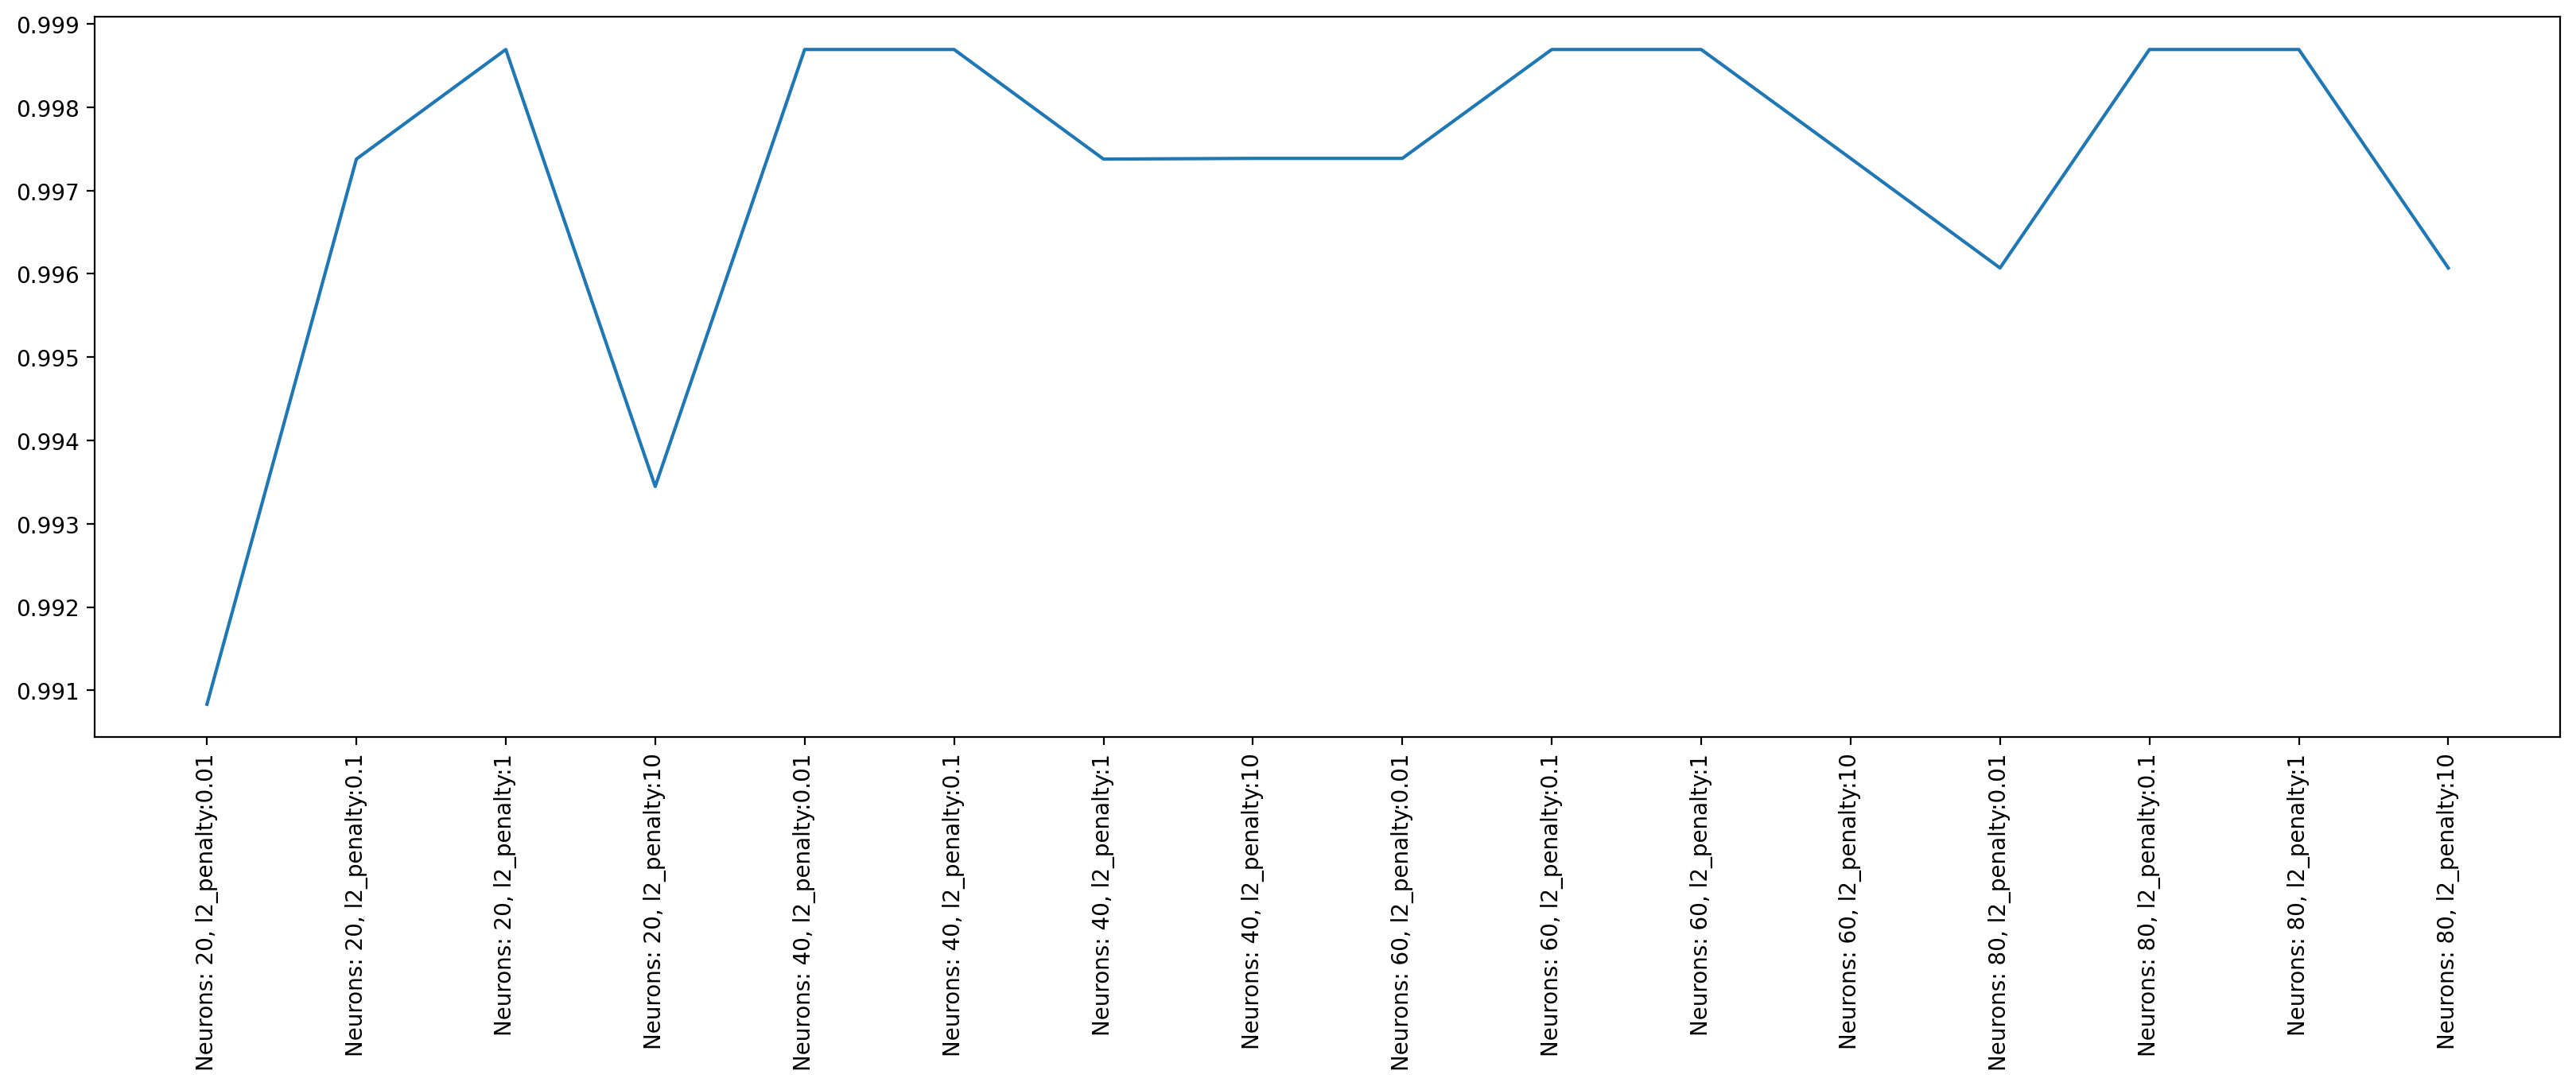

In [66]:
# plot
X = []
for i in range(len(meanAcc)):
  X.append('Neurons: ' + str(meanAcc[i][0]) + ', l2_penalty:' + str(str(meanAcc[i][1])))
Y = [x[2] for x in meanAcc]

# to find hyperparams corresponding to max f1 score
ind_maxF1Score_nn = np.argmax(Y)
print('Best hyperparameters:')
print('Neurons in hidden layer: ' + str(meanAcc[ind_maxF1Score_nn][0]) + ', l2_penalty: ' + str(meanAcc[ind_maxF1Score_nn][1]))

plt.figure(figsize=(20,6),dpi=200)
plt.plot(X,Y)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
* Mean accuracy = 0.998
* We get maximum value for following hyperparameters:

  Number of neurons in hidden layer = 20
  
  L2 penalty parameter = 1

#### Testing best neural network on test data

In [67]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1, learning_rate='adaptive', hidden_layer_sizes=(40,), random_state=1,max_iter=3000)
clf.fit(train_X, train_Y)
print('Mean accuracy on test data: ' + str(clf.score(test_X,test_Y)))

Mean accuracy on test data: 0.7022222222222222


### Random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()
scoring='accuracy'
hyper_params = {'max_depth':[2,5,10,20,30],'n_estimators':[10,30,100,200]}
rfclf = GridSearchCV(rfc, param_grid = hyper_params, scoring = scoring, cv=kf)
rfclf.fit(train_X,np.squeeze(train_Y))
print('Best parameters:')
print(rfclf.best_params_)
print('Best ' + scoring + ': ' + str(rfclf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfclf.predict(test_X)
print(classification_report(y_true, y_pred))

Best parameters:
{'max_depth': 10, 'n_estimators': 200}
Best accuracy: 0.9973684210526315
Test classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        60
         1.0       0.76      0.52      0.61        60
         2.0       0.84      0.70      0.76        60
         3.0       0.55      0.78      0.64        45

    accuracy                           0.71       225
   macro avg       0.72      0.72      0.70       225
weighted avg       0.73      0.71      0.71       225



**Observations:**
* Best parameters:
'max_depth': 10, 'n_estimators': 200
* Best cross-validation accuracy: 0.997
* Weighted test accuracy: 0.72

  ### To find feature importance

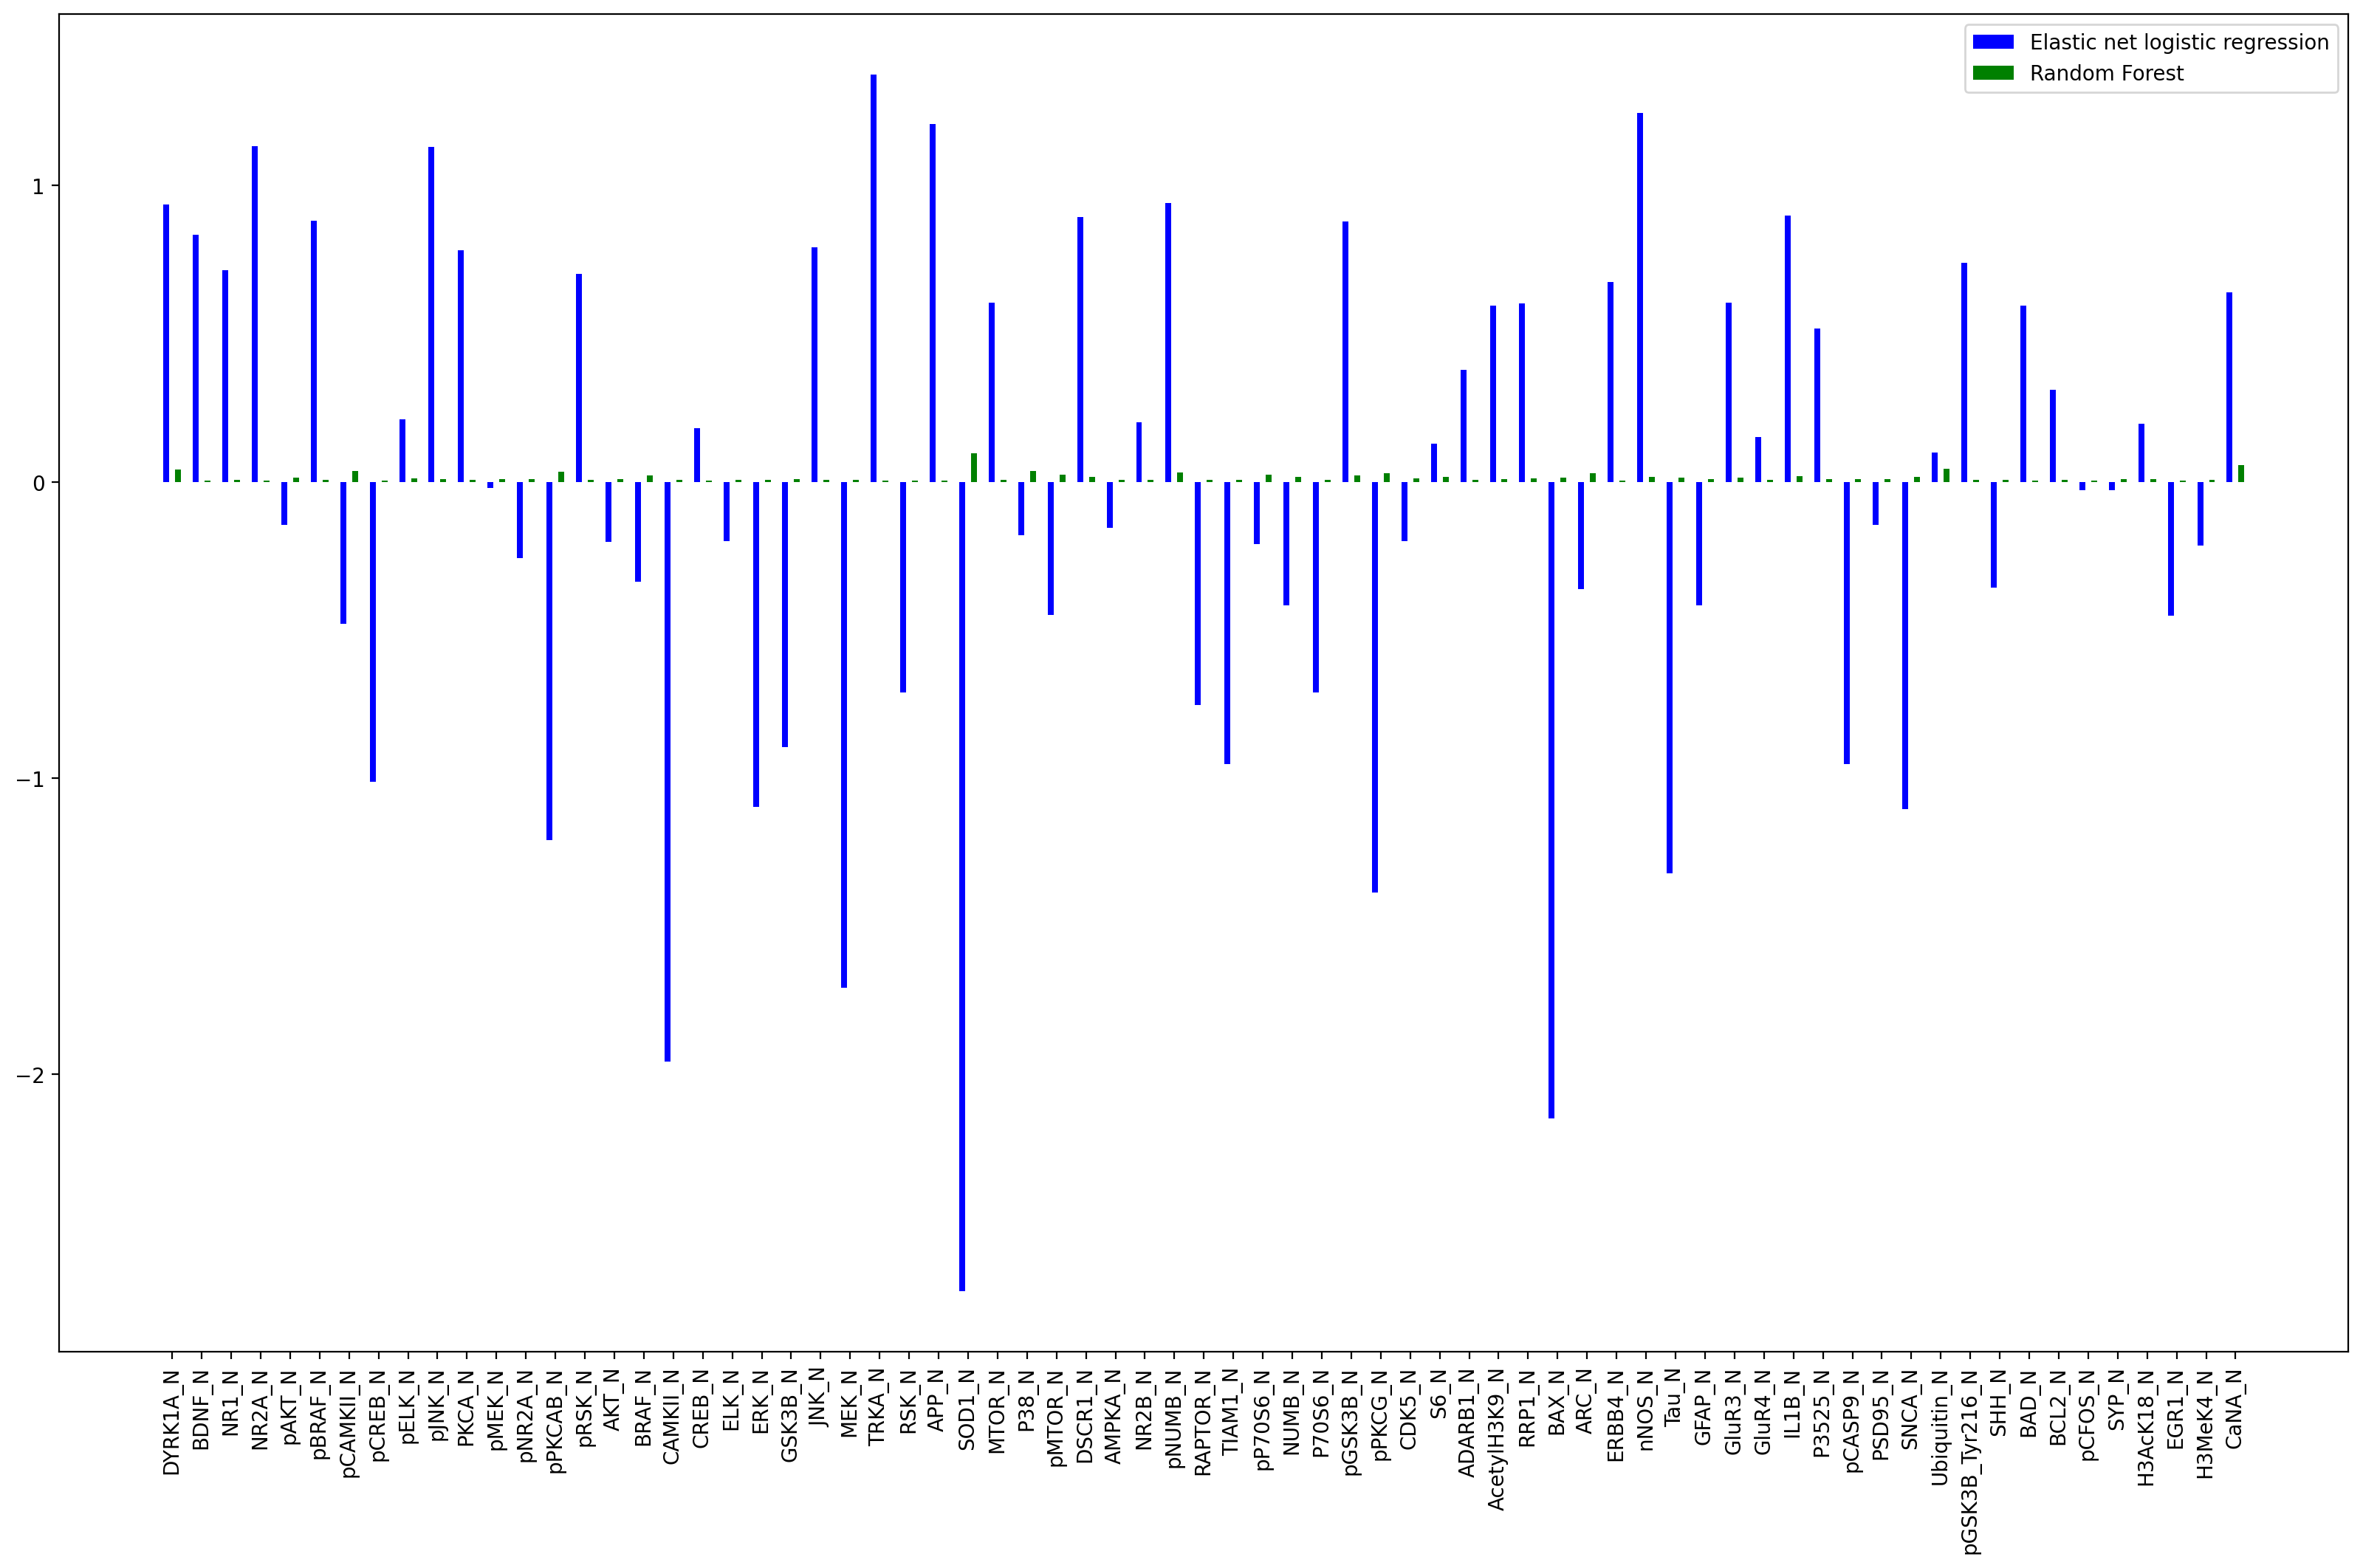

In [70]:
featImport_elasNet = elasNetClf.best_estimator_.coef_[0]
if svcClf.best_params_['kernel'] == 'linear':
  featImport_svc = svcClf.best_estimator_.coef_[0]
featImport_randomForest = rfclf.best_estimator_.feature_importances_
# summarize feature importance

# plot feature importance
# set width of bars
barWidth = 0.2

plt.figure(figsize=(20, 12),dpi=200)
featNames = elasNetClf.feature_names_in_
r1 = np.arange(len(featNames))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, featImport_elasNet,color='b',width=barWidth, label='Elastic net logistic regression')
if svcClf.best_params_['kernel'] == 'linear':
  plt.bar(r2, featImport_svc,color='r',width=barWidth, label='SVC')
plt.bar(r3, featImport_randomForest,color='g',width=barWidth, label='Random Forest')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(featNames))], featNames)

plt.xticks(rotation='vertical')
plt.legend()
plt.show()

https://pythonspot.com/matplotlib-bar-chart/

https://python-graph-gallery.com/11-grouped-barplot

https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib

## Recursive feature elimination
* For recursive feature elimination we need all features given in input dataset. i.e all columns will be there including correlated columns as well.

In [71]:
from sklearn.feature_selection import RFECV

### Recursive feature elimination for Logistic regression

In [72]:
print('Recursive feature elimination with elastic-net logistic regression')
scoring = 'accuracy'

rfeClf = RFECV(estimator=elasNetClf.best_estimator_,scoring=scoring, cv=kf,n_jobs=-1)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

Recursive feature elimination with elastic-net logistic regression
Number of selected feature: 75
Test classification report:
              precision    recall  f1-score   support

         0.0       0.52      0.98      0.68        60
         1.0       1.00      0.43      0.60        60
         2.0       0.89      0.13      0.23        60
         3.0       0.58      1.00      0.74        45

    accuracy                           0.61       225
   macro avg       0.75      0.64      0.56       225
weighted avg       0.76      0.61      0.55       225



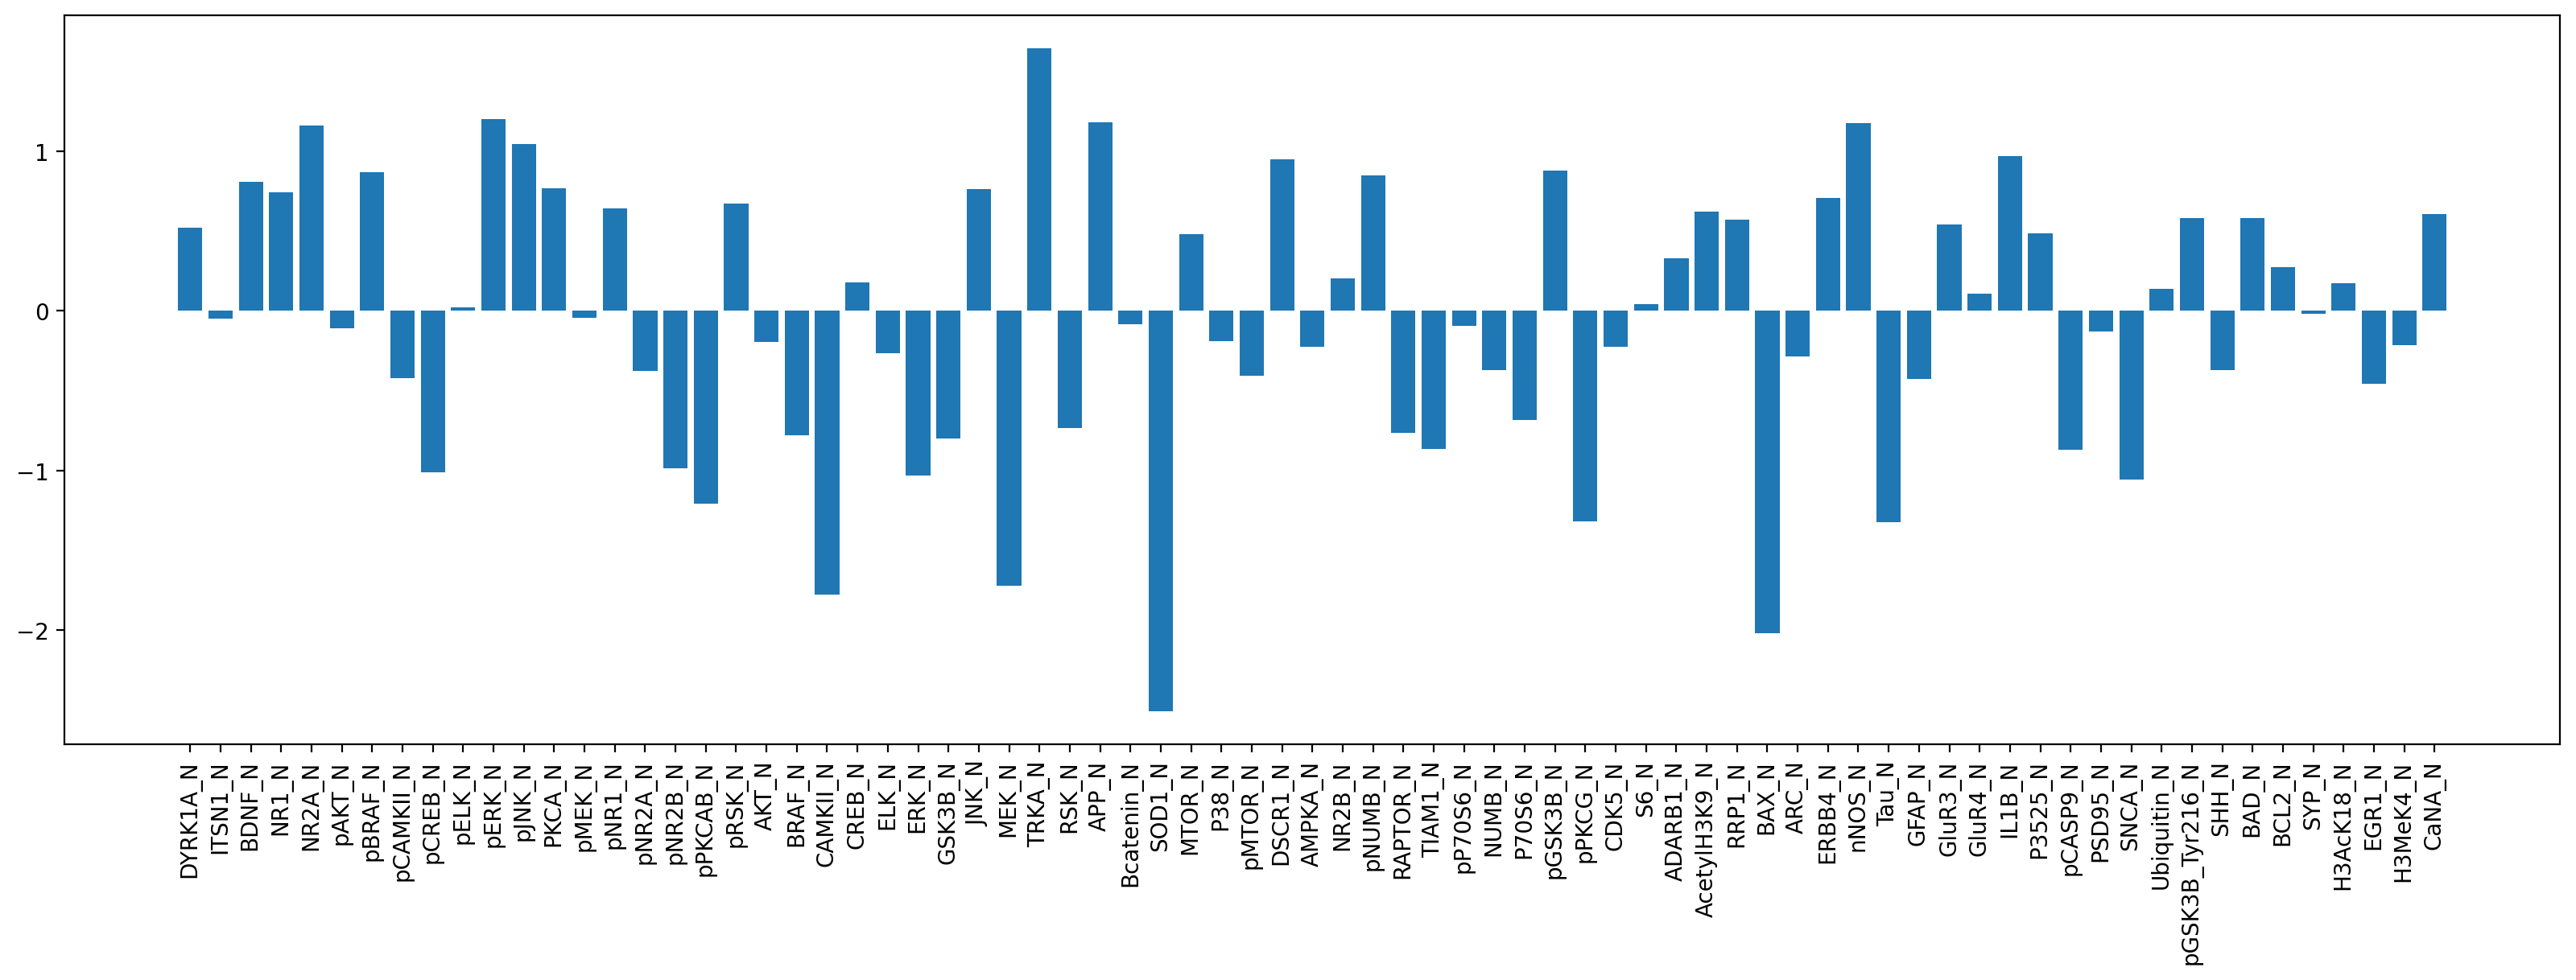

In [73]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.coef_[0]

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
* After RFE on best model with elastic net, 

  75 features out of total 77 are retained in the model.

* Weighted avg accuracy on test data slightly increases from 0.51 to 0.55

### Recursive feature elimination for SVC

In [74]:
from sklearn.feature_selection import RFECV

print('Recursive feature elimination with SVC')
scoring = 'accuracy'

rfeClf = RFECV(estimator=svcClf.best_estimator_,scoring=scoring, cv=kf)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

Recursive feature elimination with SVC


ValueError: ignored

In [ ]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.coef_[0]

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
* Since we got SVC with poly kernel as best estimator during GridSearchCV, we cannot use coef_ for RFE. DUe to this above error is coming

### Recursive feature elimination for Random Forest Classifier

In [75]:
print('Recursive feature elimination with random forest classifier')
scoring = 'accuracy'

rfeClf = RFECV(estimator=rfclf.best_estimator_,scoring=scoring, cv=kf)
rfeClf.fit(train_X_allCols, np.squeeze(train_Y))

print('Number of selected feature: ' + str(rfeClf.n_features_))

print('Test classification report:')
y_true, y_pred = np.squeeze(test_Y), rfeClf.predict(test_X_allCols)
print(classification_report(y_true, y_pred))

Recursive feature elimination with random forest classifier
Number of selected feature: 44
Test classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        60
         1.0       0.75      0.45      0.56        60
         2.0       0.80      0.72      0.75        60
         3.0       0.52      0.80      0.63        45

    accuracy                           0.69       225
   macro avg       0.70      0.70      0.68       225
weighted avg       0.71      0.69      0.68       225



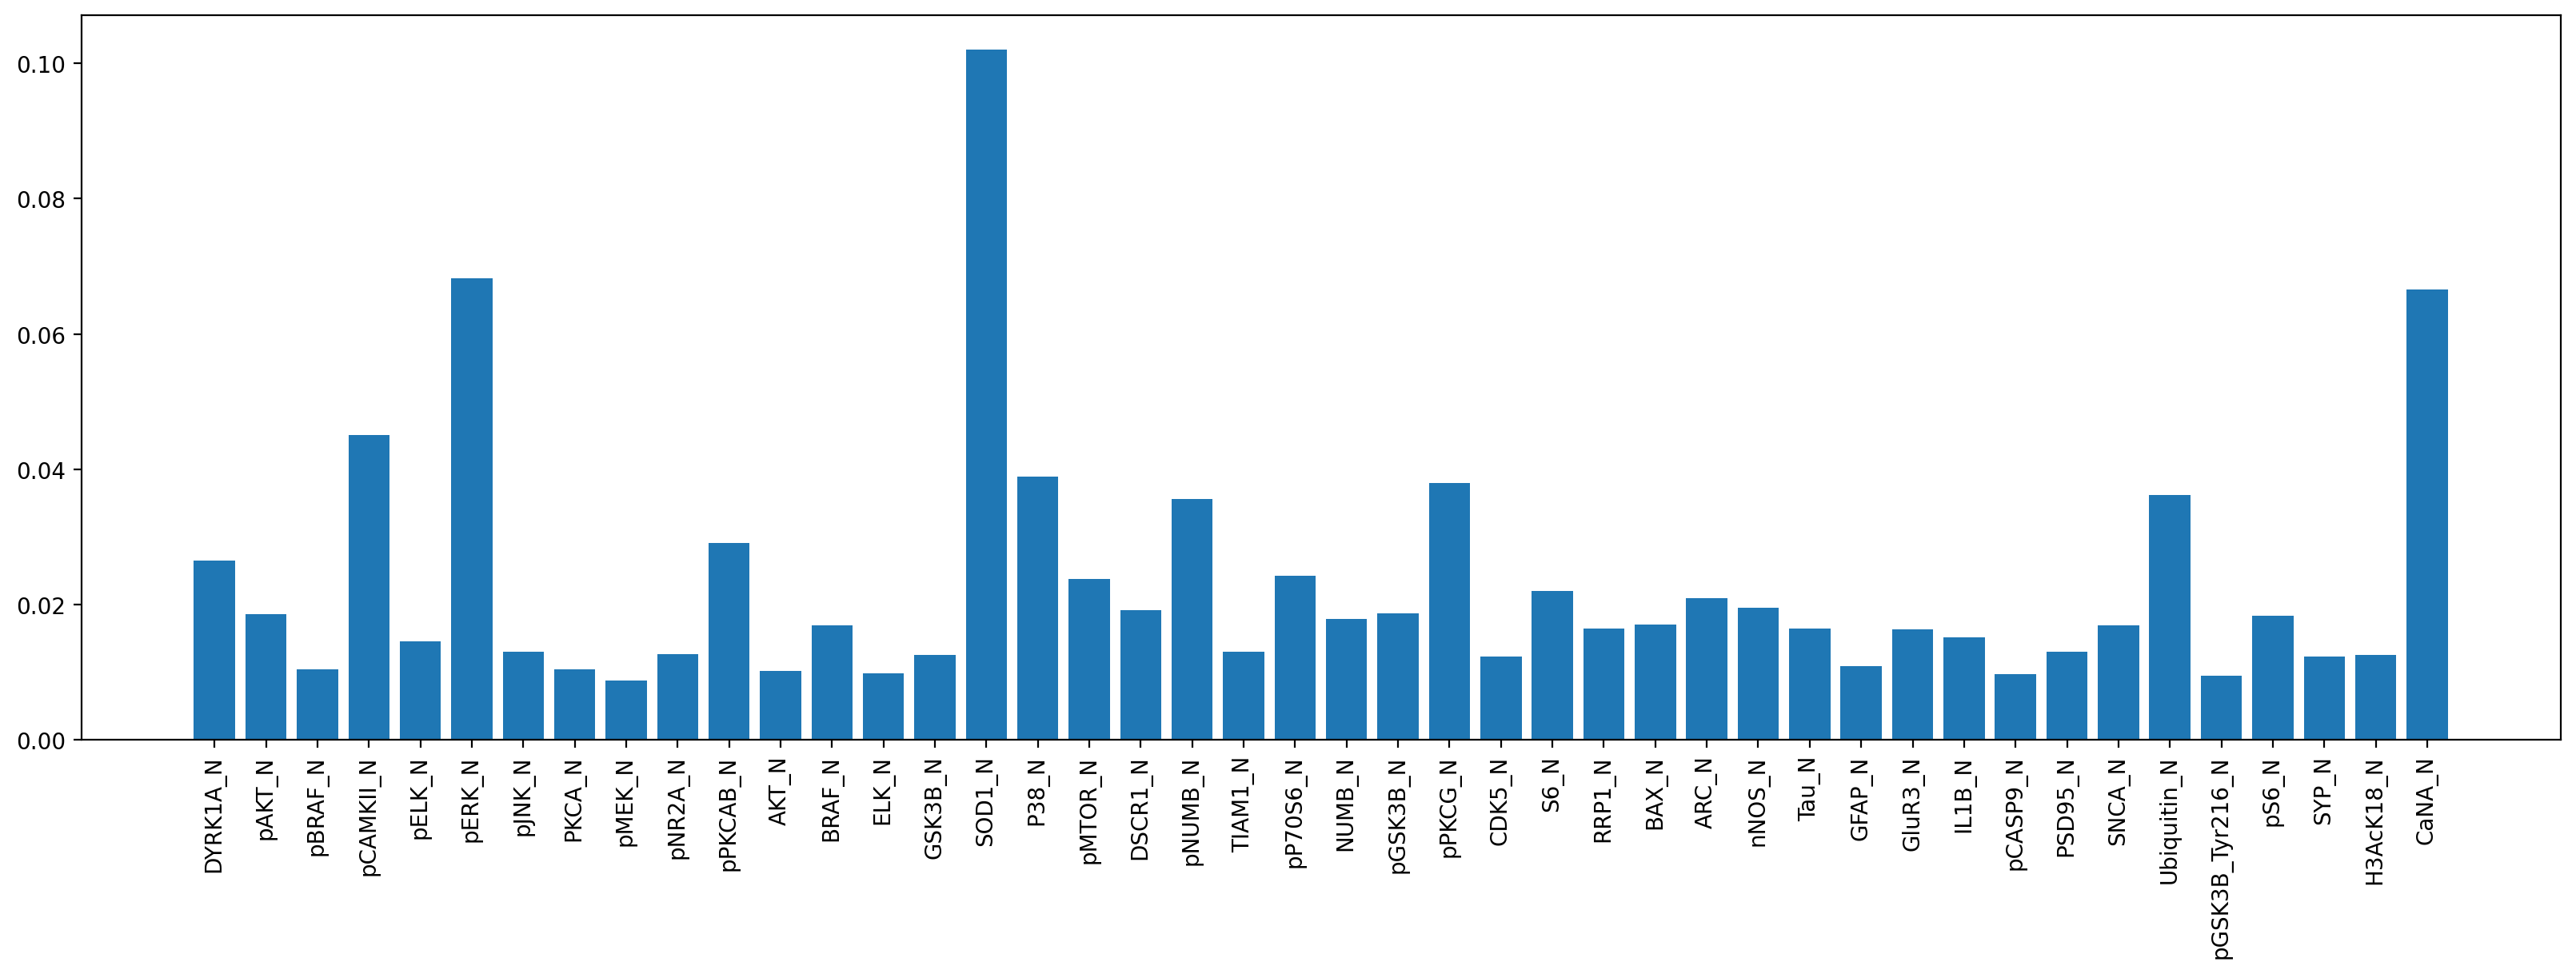

In [76]:
featNames = rfeClf.feature_names_in_
featNames_selected = featNames[rfeClf.support_]
featCoef = rfeClf.estimator_.feature_importances_

plt.figure(figsize=(20,6),dpi=200)
plt.bar(featNames_selected,featCoef)
plt.xticks(rotation='vertical')
plt.show()

**Observations:**
* After recursive feature elimination, **68** features out of total 77 features are retained in the model.
* The weighted accuracy of model on test data reduces very slightly from **0.72 to 0.71**